In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d

# 1.- Comprensión de los Datos

# Índice

- [1.1.- Dataset Origen (Datos Macroeconómicos)](#11)
>- [1.1.1.- Descripción del conjunto de datos](#111)
>- [1.1.2- Características generales](#112)
>- [1.1.3- Revisión de valores ausentes](#113)
>- [1.1.4- Distribución de muestras por clase](#114)
>- [1.1.5- Conclusiones previas](#115)
- [1.2.- Preparación de Dataset de Trabajo](#12)
- [1.3- Dataset de trabajo final](#13)
>- [1.3.1- Descripción del conjunto de datos](#131)
>- [1.3.2- Características generales](#132)
>- [1.3.3- Revisión de valores ausentes](#133)
>- [1.3.4- Distribución de muestras por clase](#134)
>- [1.3.5- Análisis exploratorio](#135)
- [1.4.- Guardar dataset final](#14)

<a id="11"></a>
## 1.1.- Dataset Origen (Datos Macroeconómicos)
Partiremos de un conjunto de datos formado por indicadores macroeconómicos pertenecientes a diferentes países y años, que posteriormente transformaremos para componer el dataset de trabajo final con el que se procederá al entrenamiento de los distintos modelos de predicción.

Vamos a comenzar realizando un análisis de los datos que contiene nuestro dataset para ver qué tipo de datos tenemos, a qué clases pertenecen, volumen de datos, valores ausentes, etc.

<a id="111"></a>
### 1.1.1.- Descripción del conjunto de datos
Se presenta a continuación la descripción del conjunto de datos origen:

|     |Nombre de Atributo | Descripción|
| --- |----------- | ---------|
|1|year | Año|
|2|country | País|
|3|iso | Código ISO del país|
|4|ifs | Código numérico del país|
|5|pop | Población|
|6|rgdpmad | PIB real per cápita (PPP, 1990 International Dollar)|
|7|rgdbarro | PIB real per cápita (index, 2005=100)|
|8|rconsbarro | Consumo real per cápita|
|9|gdp | Producto Interior Bruto|
|10|iy | Inversión ponderada por PIB|
|11|cpi | Índice de precios al consumo (IPC)|
|12|ca | Estado de cuenta corriente|
|13|imports | Importaciones|
|14|exports | Exportaciones|
|15|narrowm | Agregado monetario estrecho (M1)|
|16|money | Agregado monetario amplio (M3)|
|17|stir | Tipo de interés a corto plazo|
|18|ltrate | Tipo de interés a largo plazo|
|19|hpnom | Precio de la vivienda|
|20|unemp | Tasa de desempleo|
|21|wage | Nivel salarial|
|22|debtgdp | Deuda pública ponderada por PIB|
|23|revenue | Ingresos públicos|
|24|expenditure | Gastos públicos|
|25|xrusd | Tipo de cambio vs Dólar|
|26|peg | Precio/Beneficio|
|27|peg_strict | Precio/Beneficio estricto|
|28|JSTtrilemmaIV | Cambios tasa base bruta|
|29|tloans | Créditos al sector privado|
|30|tmort | Créditos hipotecarios al sector privado|
|31|thh | Crédito a los hogares|
|32|tbus | Crédito a los negocios|
|33|bdebt | Deuda corporativa|
|34|peg_type | Precio/Beneficio tipo|
|35|peg_base | Precio/Beneficio base|
|36|eq_tr | Rentabilidad total del capital|
|37|housing_tr | Rentabilidad total de la vivienda|
|38|bond_tr | Rentabilidad del bono del estado|
|39|bill_rate | Tarifa de facturación|
|40|rent_ipolated | Rentabilidad de la vivienda interpolado|
|41|housing_capgain_ipolated | Plusvalía de vivienda interpolado|
|42|housing_capgain | Plusvalía de vivienda|
|43|housing_rent_rtn | Retorno rentabilidad alquiler de vivienda|
|44|housing_rent_yd | Rentabilidad alquiler de vivienda|
|45|eq_capgain | Ganancia por acciones|
|46|eq_dp | Ganancia por dividendo|
|47|eq_capgain_interp | Ganancia por acciones interpolado|
|48|eq_tr_interp | Ganancia total por acciones interpolado|
|49|eq_dp_interp | Ganancia por dividendo interpolado|
|50|bond_rate | Tipo bono del estado|
|51|eq_div_rtn | Retorno por dividendo|
|52|capital_tr | Retorno de riqueza|
|53|risky_tr | Retorno por activos de riesgo|
|54|safe_tr | Retorno por activos seguros|
|55|lev | Ratio de capital bancario|
|56|ltd | Ratio préstamos/depósitos bancarios|
|57|noncore | Ratio de financiación no básica bancaria|

La clase viene representada por la variable crisisJST de tipo binario con valores '0'=No Crisis y '1'=Crisis.


<a id="112"></a>
### 1.1.2- Características generales
Vamos a revisar las características de los atributos y de las muestras contenidas en el dataset:

In [2]:
# Cqrgamos nuestro dataset
data = pd.read_csv('../datasets/JSTdatasetR6.csv', sep=';', na_values='', decimal=',')

# Modificación de parámetros de visualización para que dado que el número de columnas es grande se muestren todas a la vez
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

# Revisamos la tipología de los datos
print('Tipología de atributos:')
display(data.dtypes)

# Revisamos las características de los mismos
print('\n\nCaracteristicas de atributos:')
display(data.describe(include='all'))
display(data.info(show_counts=True))

# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países y sus valores
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')
print(f'{np.unique(data["country"])}\n\n')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

# Mostramos una muestra de los registros
print('Muestra de datos:')
display(data.sample(5))

Tipología de atributos:


year                          int64
country                      object
iso                          object
ifs                           int64
pop                         float64
rgdpmad                     float64
rgdpbarro                   float64
rconsbarro                  float64
gdp                         float64
iy                          float64
cpi                         float64
ca                          float64
imports                     float64
exports                     float64
narrowm                     float64
money                       float64
stir                        float64
ltrate                      float64
hpnom                       float64
unemp                       float64
wage                        float64
debtgdp                     float64
revenue                     float64
expenditure                 float64
xrusd                       float64
tloans                      float64
tmort                       float64
thh                         



Caracteristicas de atributos:


year    country   iso          ifs            pop       rgdpmad  \
count   2718.00000       2718  2718  2718.000000    2667.000000   2666.000000   
unique         NaN         18    18          NaN            NaN           NaN   
top            NaN  Australia   AUS          NaN            NaN           NaN   
freq           NaN        151   151          NaN            NaN           NaN   
mean    1945.00000        NaN   NaN   148.333333   31439.397574   9155.064763   
std       43.59701        NaN   NaN    24.165940   45898.993728   7976.190143   
min     1870.00000        NaN   NaN   111.000000    1675.000000    737.375497   
25%     1907.00000        NaN   NaN   132.000000    4866.650000   2873.047663   
50%     1945.00000        NaN   NaN   143.000000   10113.530000   5477.011227   
75%     1983.00000        NaN   NaN   172.000000   45077.000000  14619.435708   
max     2020.00000        NaN   NaN   193.000000  329239.715278  45887.569802   

          rgdpbarro   rconsbarro           gdp           iy           cpi  \
count   2664.000000  2561.000000  2.641000e+03  2425.000000  2.666000e+03   
unique          NaN          NaN           NaN          NaN           NaN   
top             NaN          NaN           NaN          NaN           NaN   
freq            NaN          NaN           NaN          NaN           NaN   
mean      39.793748    42.133609  2.454826e+06     0.188838  4.191118e+01   
std       33.884462    32.274402  1.615548e+07     0.064621  5.689962e+01   
min        3.263085     4.074400  1.250757e-11     0.017287  1.150362e-11   
25%       12.694448    15.650000  5.428200e+01     0.140980  2.526395e+00   
50%       23.056114    27.846700  1.810926e+03     0.194356  1.050679e+01   
75%       65.770534    68.720000  5.038345e+04     0.230288  7.617557e+01   
max      147.282620   120.431162  2.070466e+08     0.546975  2.268252e+02   

                  ca       imports       exports       narrowm         money  \
count   2.489000e+03  2.603000e+03  2.603000e+03  2.604000e+03  2.518000e+03   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean   -4.572271e+04  8.097705e+05  7.925207e+05  1.178995e+06  2.404282e+06   
std     7.670287e+05  4.947326e+06  4.956606e+06  1.077840e+07  1.645903e+07   
min    -1.687900e+07  2.803000e-12  2.278000e-12  1.084000e-12  2.919525e-12   
25%    -6.345947e+01  5.029000e+00  5.110800e+00  9.363653e+00  1.630303e+01   
50%    -3.300000e-02  4.873701e+02  4.523997e+02  3.109166e+02  8.713446e+02   
75%     1.788000e+01  1.217368e+04  1.040987e+04  1.301771e+04  2.375057e+04   
max     5.885998e+06  6.630599e+07  7.237242e+07  2.330690e+08  2.357367e+08   

               stir       ltrate         hpnom        unemp          wage  \
count   2520.000000  2630.000000  2.050000e+03  1949.000000  2.630000e+03   
unique          NaN          NaN           NaN          NaN           NaN   
top             NaN          NaN           NaN          NaN           NaN   
freq            NaN          NaN           NaN          NaN           NaN   
mean       4.677768     5.448643  6.695866e+01     5.484313  4.502840e+01   
std        3.332995     3.157725  1.061554e+02     4.081174  7.226900e+01   
min       -2.000000    -0.525000  3.014026e-12     0.035923  8.320876e-13   
25%        2.627500     3.587708  2.423478e+00     2.300000  4.557921e-01   
50%        4.122500     4.609167  9.883473e+00     4.600000  3.711042e+00   
75%        5.758750     6.329375  9.785925e+01     7.524200  7.435417e+01   
max       21.273300    23.715415  6.459109e+02    26.093600  3.236591e+02   

            debtgdp       revenue   expenditure         xrusd        tloans  \
count   2489.000000  2.542000e+03  2.561000e+03  2.665000e+03  2.465000e+03   
unique          NaN           NaN           NaN           NaN           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2718 non-null   int64  
 1   country                   2718 non-null   object 
 2   iso                       2718 non-null   object 
 3   ifs                       2718 non-null   int64  
 4   pop                       2667 non-null   float64
 5   rgdpmad                   2666 non-null   float64
 6   rgdpbarro                 2664 non-null   float64
 7   rconsbarro                2561 non-null   float64
 8   gdp                       2641 non-null   float64
 9   iy                        2425 non-null   float64
 10  cpi                       2666 non-null   float64
 11  ca                        2489 non-null   float64
 12  imports                   2603 non-null   float64
 13  exports                   2603 non-null   float64
 14  narrowm 

None



Volumetría de datos:
Número de Instancias: 2718
Número de Atributos: 58


Número Total de Países: 18
['Australia' 'Belgium' 'Canada' 'Denmark' 'Finland' 'France' 'Germany'
 'Ireland' 'Italy' 'Japan' 'Netherlands' 'Norway' 'Portugal' 'Spain'
 'Sweden' 'Switzerland' 'UK' 'USA']


Número Total de Años: 151
[1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 200

year      country  iso  ifs        pop       rgdpmad  rgdpbarro  \
132   2002    Australia  AUS  193   19345.00  22236.935273  94.340964   
2286  1891     Portugal  PRT  182    5068.00   1099.450000   7.826571   
2612  1915          USA  USA  111  100941.00   4864.192617  13.251553   
550   1967  Switzerland  CHE  146    6063.00  15010.390896  62.264749   
1785  1994        Italy  ITA  136   57179.46  16761.739574  80.213195   

      rconsbarro           gdp        iy         cpi           ca  \
132      89.3663  7.542530e+05  0.254578  133.769595 -28767.20942   
2286         NaN  8.110000e+02       NaN    0.049486    -19.00000   
2612     16.3856  3.904800e+01  0.111503    8.178380      1.13400   
550      60.5500  8.118415e+04  0.260483   40.520240   1180.72500   
1785     85.7900  1.707793e+06  0.187402  121.400000  21527.23566   

            imports        exports        narrowm         money      stir  \
132   134039.000000  119458.000000  179972.440350  5.372772e+05  4.550833   
2286      40.000000      21.000000      71.000000  7.100000e+01  7.000000   
2612       1.703000       2.820000       2.990000  2.141000e+01  1.920000   
550    17786.000000   15165.000000   35956.668303  7.245050e+04  3.000000   
1785  330390.009894  389284.372722  598367.000000  1.214942e+06  9.165050   

         ltrate       hpnom      unemp        wage   debtgdp       revenue  \
132    5.843958  195.965797   6.367600  147.496193  0.150620  170753.00000   
2286   7.070000         NaN        NaN    0.027672  0.718866      39.00000   
2612   4.065833    4.851712   8.500000    2.352739  0.030508       0.68300   
550    4.610000   29.221733   0.089056   26.177177  0.358000    5718.00000   
1785  10.520000  109.517393  11.092800  121.785600  1.171309  508673.61916   

      expenditure        xrusd        tloans        tmort       thh      tbus  \
132    174403.000     1.766160  6.380610e+05  350989.0000  410680.0  227381.0   
2286       49.000     0.993942  3.613700e+01          NaN       NaN       NaN   
2612        0.746     1.000000  1.845580e+01       6.3548       NaN       NaN   
550      5873.800     4.325000  7.820300e+04   42229.0000   41062.5   37140.5   
1785   601000.000  1629.740000  1.042638e+06  389759.3125  302218.0  740420.0   

           bdebt        lev         ltd    noncore  crisisJST  crisisJST_old  \
132    570396.00   5.398369  121.309975  43.931485        0.0            0.0   
2286         NaN        NaN         NaN        NaN        0.0            0.0   
2612         NaN  14.683352   80.555367   9.178687        0.0            0.0   
550     62280.75   6.346439   98.930000  36.121880        0.0            0.0   
1785  1270212.00   6.010831  105.090462  64.436203        0.0            0.0   

      peg  peg_strict peg_type peg_base  JSTtrilemmaIV     eq_tr  housing_tr  \
132   0.0         0.0    FLOAT      USA          0.000 -0.080964    0.236952   
2286  0.0         0.0    FLOAT      GBR          0.000 -0.150495         NaN   
2612  1.0         1.0      PEG      NaN            NaN  0.348299   -0.027026   
550   1.0         1.0      PEG      USA         -0.890  0.471908    0.044015   
1785  1.0         0.0      PEG      DEU         -2.142  0.094710    0.017358   

       bond_tr  bill_rate  rent_ipolated  housing_capgain_ipolated  \
132   0.127731   0.045508            NaN                       NaN   
2286 -0.179920   0.070000            NaN                       NaN   
2612  0.044905   0.035000            NaN                       NaN   
550   0.055553   0.035717            NaN                       NaN   
1785 -0.109072   0.091651            NaN                       NaN   

      housing_capgain  housing_rent_rtn  housing_rent_yd  eq_capgain  \
132          0.204640          0.032312         0.026823   -0.114408   
2286              NaN               NaN              NaN   -0.198415   
2612        -0.070643          0.043617         0.046933    0.289796   
550          0.003779          0.040236         0.040084    0.

+ La mayor parte de los atributos son de tipo numérico, salvo algunas excepciones como 'year', 'country', 'iso', etc., que son de tipo categórico.
+ Como se puede observar disponemos de datos asociados a un total de 18 países con cobertura global y pertenecientes eminéntemente a economías desarrolladas.
+ Se contempla un periodo temporal que abarca desde el año 1870 a 2020.
+ Algunos de los atributos poseen un elevado volumen de valores ausentes.

<a id="113"></a>
### 1.1.3- Revisión de valores ausentes
Vamos a revisar en más detalle la distribución de los valores ausentes:

In [3]:
# Revisamos la distribución de los valores ausentes
num_ausentes = data.loc[:, ~data.columns.isin(['crisisJST', 'crisisJST_old'])].isna().sum()
porcentaje = round(num_ausentes / data.shape[0] * 100, 2)
porcentaje.sort_values(ascending=False, inplace=True)
porcentaje_med = round(np.sum(porcentaje) / porcentaje.shape[0], 2)
print(f'Porcentaje Medio de Valores Ausentes: {porcentaje_med}%\n')
print('Porcentaje de Valores Ausentes por Atributo')
print(porcentaje)

Porcentaje Medio de Valores Ausentes: 21.05%

Porcentaje de Valores Ausentes por Atributo
housing_capgain_ipolated    99.82
eq_dp_interp                99.78
eq_tr_interp                99.74
eq_capgain_interp           99.74
rent_ipolated               98.93
tbus                        52.21
thh                         49.45
capital_tr                  32.67
risky_tr                    31.79
bdebt                       31.38
housing_rent_rtn            29.76
housing_tr                  29.76
housing_rent_yd             29.32
unemp                       28.29
housing_capgain             24.76
hpnom                       24.58
JSTtrilemmaIV               23.73
eq_div_rtn                  20.42
eq_dp                       20.20
eq_capgain                  20.16
noncore                     17.95
safe_tr                     17.33
eq_tr                       16.74
bond_tr                     15.56
ltd                         15.42
tmort                       14.94
bill_rate                 

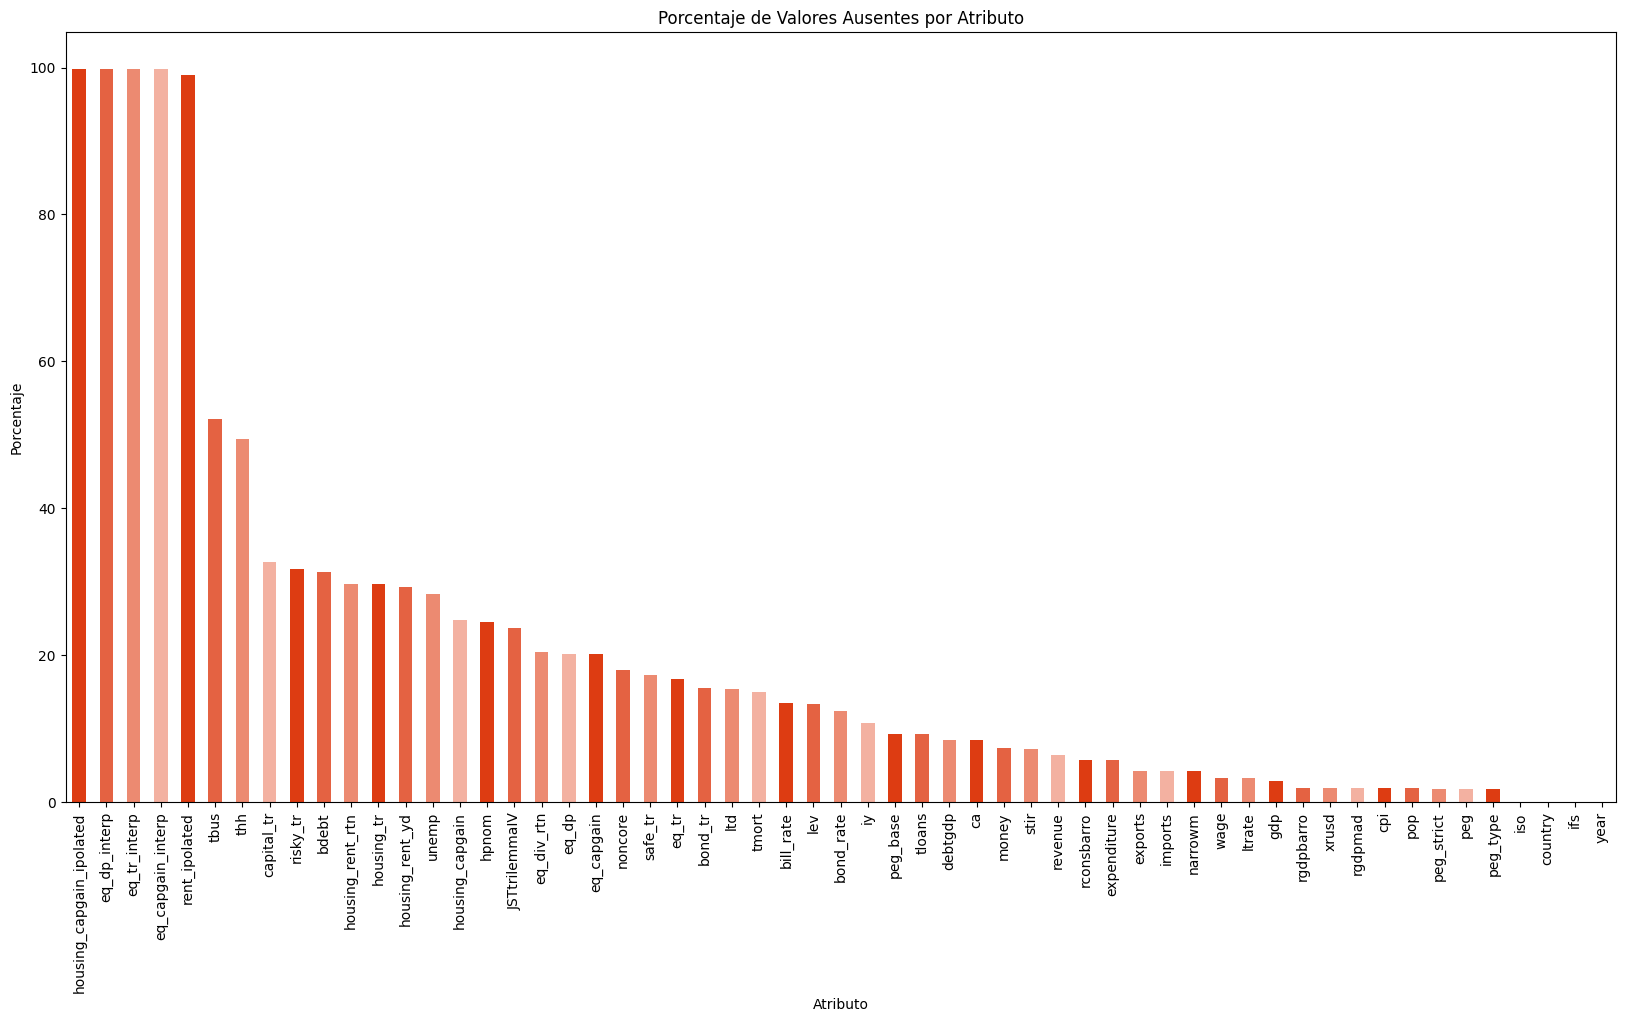

In [4]:
# Establecemos la paleta de colores de VIU
viu_colors = ['#dd3c12', '#e46242', '#ec8a71', '#f3b1a1',
              '#dd3c12', '#e46242', '#ec8a71', '#f3b1a1',
              '#dd3c12', '#e46242', '#ec8a71']

etiquetas = ['No Crisis', 'Crisis']

porcentaje.plot(kind="bar", figsize=(20,10), color=viu_colors).set(title='Porcentaje de Valores Ausentes por Atributo')
plt.xlabel('Atributo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.savefig('../app/graficas/comprension_bruto_ausentes_atributo.png', bbox_inches='tight')
plt.show()

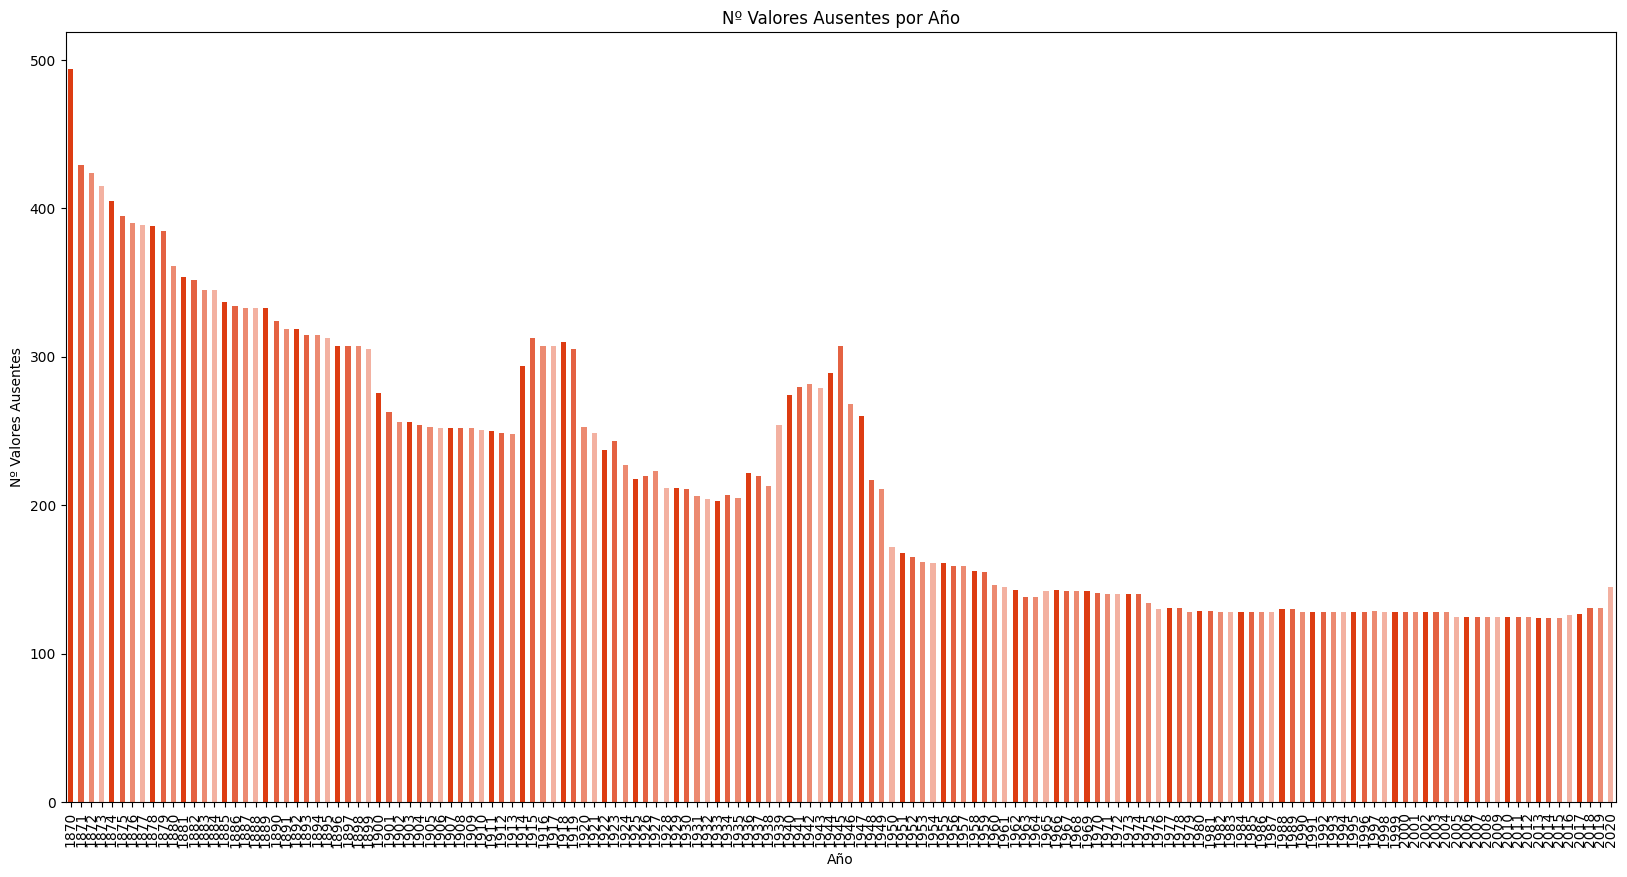

In [5]:
agrupacion = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Valores Ausentes por Año',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_bruto_ausentes_anio.png', bbox_inches='tight')
plt.show()

+ Se observa que la mayor parte de los valores ausentes se concentra en determinados atributos, por lo que en principio carecerían de utilidad dada la escasa información que aportarían al modelo.
+ A nivel temporal los valores ausentes se encuentran sobre todo en los años iniciales.

Una vez conocida esta distribución, se establecerá como primer criterio de filtrado que únicamente se utilizará la información correspondiente a las instancias con un número total de valores ausentes inferior al 30% del total del número de atributos. De manera adicional, se usará únicamente la serie temporal contigua con un número de instancias útiles superior también al 30% del número total de países por año, es decir, sólo se usarán los años contiguos en los que todos garanticen los dos criterios anteriores:

In [6]:
# Obtenemos el número de muestras de países por año para el primer criterio
# (número total de valores ausentes inferior al 30%)

th_atributos = data.shape[1]*30/100
datos_agrupados = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1) > th_atributos).sum())
print(pd.Series(datos_agrupados, name='Muestras Inválidas'))

# Calculamos la serie de años final que cumple tanto el primer criterio como el segundo:
th_anios = len(np.unique(data["iso"]))*30/100
ultimo_anio_no_util = datos_agrupados[::-1].gt(th_anios).idxmax()
print(f'Años útiles: {np.unique(data[data["year"]>ultimo_anio_no_util]["year"])}')

year
1870    18
1871    13
1872    14
1873    14
1874    14
1875    13
1876    13
1877    13
1878    13
1879    13
1880    11
1881    11
1882    11
1883    11
1884    11
1885    10
1886    10
1887    10
1888    10
1889    10
1890     9
1891     9
1892     9
1893     8
1894     8
1895     8
1896     8
1897     8
1898     8
1899     8
1900     4
1901     4
1902     4
1903     4
1904     4
1905     4
1906     4
1907     4
1908     4
1909     4
1910     4
1911     4
1912     4
1913     3
1914     4
1915     7
1916     7
1917     7
1918     7
1919     7
1920     4
1921     4
1922     3
1923     3
1924     3
1925     2
1926     2
1927     2
1928     2
1929     2
1930     2
1931     2
1932     2
1933     2
1934     2
1935     2
1936     3
1937     3
1938     3
1939     4
1940     5
1941     4
1942     5
1943     5
1944     5
1945     7
1946     5
1947     5
1948     3
1949     3
1950     2
1951     2
1952     2
1953     2
1954     2
1955     2
1956     2
1957     2
1958     2
1959     2
1960 

Tras este primer filtrado el periodo temporal contemplado por el conjunto de datos se ha visto reducido a los años desde 1946 a 2020.

Eliminamos las instancias no útiles y revisamos las volumetrías finales:

In [7]:
# Establecemos la variable que indicará el periodo de preaviso de posible crisis y que se usará para la obtención del modelo de datos final
retraso = 2             # Indica qué diferencia de años se usa para los cálculos diferenciales

data.drop(data[data['year'] <= ultimo_anio_no_util-retraso].index, inplace=True) # Hay que dejar los dos años previos para los cálculos diferenciales
data = data.reset_index(drop=True)

In [8]:
# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')





Volumetría de datos:
Número de Instancias: 1386
Número de Atributos: 58


Número Total de Países: 18
Número Total de Años: 77
[1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]




<a id="114"></a>
### 1.1.4- Distribución de muestras por clase
Revisaremos a continuación la distribución del número de muestras según la clase:

Clases: [0. 1.]
Etiquetas ['No Crisis', 'Crisis']
Ocurrencias: [1361   25]
Porcentajes [98.2  1.8]


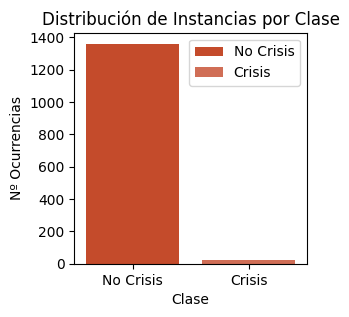

In [9]:
clases, ocurrencias = np.unique(data['crisisJST'], return_counts=True)
porcentajes = np.round(ocurrencias / data.shape[0] * 100, 2)
print(f'Clases: {clases}\nEtiquetas {etiquetas}\nOcurrencias: {ocurrencias}\nPorcentajes {porcentajes}')


fig,ax = plt.subplots(figsize=(3,3))
ax = sns.countplot(data, x='crisisJST', palette=sns.color_palette(viu_colors,2)).set(title='Distribución de Instancias por Clase')
plt.xlabel('Clase')
plt.ylabel('Nº Ocurrencias')
plt.xticks(ticks=[0,1],labels=etiquetas)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_bruto_instancias_clase.png', bbox_inches='tight')
plt.show()

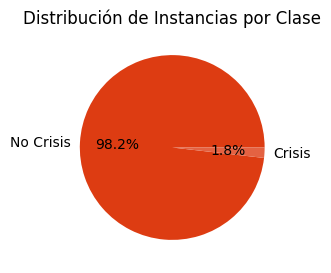

In [10]:
fig,ax = plt.subplots(figsize=(3,3))
aggregates = data['crisisJST'].value_counts()
plt.pie(aggregates, labels = etiquetas, colors=sns.color_palette(viu_colors, 2), autopct='%.1f%%')
plt.title('Distribución de Instancias por Clase')
plt.savefig('../app/graficas/comprension_bruto_porcentaje_clase.png', bbox_inches='tight')
plt.show()

<a id="115"></a>
### 1.1.5- Conclusiones previas
Como puntos a descatar sobre nuestro dataset:
* Existe un acusado desbalance de instancias asociadas a cada clase
* El volumen de valores ausentes era elevado en algunos atributos y hemos tenido que realizar un primer filtrado de datos brutos útiles.
* Debemos trabajar con datos asociados a series temporales.

<a id="12"></a>
# 1.2.- Preparación de Dataset de Trabajo

A partir de los datos anteriores se procederá a la elaboración de los siguientes nuevos atributos que serán los finalmente usados como base para el proceso de entrenamiento:
+ Diferencial relativo del Índice de Precios al Consumo.
+ Diferencial absoluto del Agregado Monetario Amplio (M3) escalado por el Producto Interior Bruto del país.
+ Diferencial relativo del Consumo Real per Cápita.
+ Diferencial absoluto del volumen de Deuda Pública escalado por el Producto Interior Bruto.
+ Diferencial absoluto del volumen de Inversión escalado por el Producto Interior Bruto.
+ Diferencial absoluto del estado de Cuenta Corriente del país escalado por el Producto Interior Bruto.
+ Diferencial absoluto del Volumen de Crédito al sector privado escalado por el Producto Interior Bruto.
+ Diferencial absoluto del ratio Volumen de Crédito al sector privado - Tipo de Interés a largo plazo.
+ Aumento de Crédito Global.
+ Curva de Rendimiento Global (Global Yield Curve).
+ Ratio Tipos de Interes a Largo Plazo vs Corto Plazo.

Se usarán indicadores relativos calculados a partir de los datos macroeconómicos, ya que por lo general ofrecen mayor información que los valores absolutos en sí.

A modo de ejemplo: el precio de la vivienda a lo largo del tiempo ha ido creciendo, pero ¿podríamos decir de forma categórica si el precio actual es alto o no sin tomar ningún otro indicador como referencia? En principio sería complicado, pero si por ejemplo calculamos un crecimiento interanual de dicho precio en un 100%, sí podríamos indicar que se ha producido un acusado aumento de los precios.

In [11]:
# Variables Globales
# Recordar que anteriormente para el cálculo del periodo de años útiles se había establecido la variable
# retraso = 2             # Indica qué diferencia de años se usa para los cálculos diferenciales

tiempo_prediccion = 2   # Indica con cuantos años de antelación queremos predecir una posible crisis
tiempo_recesion = 4     # Indica cuantos años se consideran como post-crisis y serán eliminados junto
                        # a los años de crisis para evitar sesgo en los datos

# Funciones auxiliares

def crear_atributos_escalados_pib(data, atributos):
    # Escalamos los atributos de entrada dividiendo su valor por el 'Gross Domestic Product'
    atributos_escalados = []
    for atributo in atributos:
        nombre = f'{atributo}_pib'
        data[nombre] = data[atributo] / data['gdp']
        atributos_escalados.append(nombre)
    return data, atributos_escalados


def calcula_atributos_diferenciales(data, atributos, tipo, retraso=2):
    # Variables calculadas como el diferencial absoluto o porcentual entre el 
    # valor actual de la variable y el asociado 'retraso' años atrás
    for atributo in atributos:
        if tipo == 'absoluto': # Diferencial Absoluto
            nombre = f'{atributo}_dif_abs{retraso}'
            data[nombre] = data.groupby('iso', group_keys=False)[atributo].diff(retraso)
        else: # Diferencial Porcentual
            nombre = f'{atributo}_dif_por{retraso}'
            data[nombre] = data.groupby('iso', group_keys=False)[atributo].apply(lambda x: cambio_relativo_historico(x, retraso))
    return data


def cambio_relativo_historico(atributo, retraso):
    # Calcula el cambio relativo para un atributo entre dos fechas 
    atributo_historico = np.array(atributo.shift(retraso))
    return (atributo - atributo_historico) / atributo_historico


def marca_pre_post_crisis(data):
    # Buscamos los años de crisis
    posiciones = data[data['crisisJST'] == 1].index
    data[data['crisisJST'] == 1].to_csv('../datasets/finales/test3.csv', sep=';', na_rep='', decimal=',', index=False)
    aux = data['crisisJST'].copy()
    for posicion in posiciones:
        # Cambiamos la clase de las intancias de crisis para borrarlas posteriormente
        aux[posicion] = 2

        # Marcamos las instancias post-crisis (importante comprobar límites de dataframe y que se mantiene
        # el mismo país)
        for j in range(posicion + 1, posicion + tiempo_recesion + 1):
            if not j >= data.shape[0]:
                if data['iso'][j] == data['iso'][posicion]:
                    aux[j] = 2
        # Marcamos las instancias pre-crisis (importante comprobar límites de dataframe y que se mantiene
        # el mismo país)
        for j in range(posicion - 1, posicion - tiempo_prediccion - 1, -1):
            if not j < 0:
                if data['iso'][j] == data['iso'][posicion]:
                    aux[j] = 1
    data['crisisJST'] = aux
    return data

def aumento_credito_global(data):
    for year in data['year'].unique():
        for country in data['iso'].unique():
                # El calculo se realiza para cada año teniendo en cuenta todos
                # los países menos el actual
            promedio = data.loc[(data['year']==year) & (data.iso != country), 'tloans_pib_dif_abs' + str(retraso)].mean()
            if not np.isnan(promedio):
                data.loc[(data['year']==year) & (data.iso == country), 'global_loan' + str(retraso)] = promedio
    return data


def pendiente_curva_yield_global(data):
    for year in data["year"].unique():
        for country in data["iso"].unique():
                # El calculo se realiza para cada año teniendo en cuenta todos
                # los países menos el actual
            promedio = data.loc[(data['year']==year) & (data.iso != country), "drate"].mean()
            if not np.isnan(promedio):
                data.loc[(data['year']==year) & (data.iso == country), "global_drate"] = promedio
    return data


def crear_dataset(df):
    # Creación del dataset de trabajo a partir de los datos en bruto
    data = df.copy()

    # Cálculo de atributos finales
    data.loc[:, 'drate'] = data['ltrate'] - data['stir']  # Rate Diferencial
    data.loc[:, 'pdebt'] = data['debtgdp'] * data['gdp']  # Deuda Pública neta
    data.loc[:, 'inv'] = data['iy'] * data['gdp']         # Inversión neta
    data.loc[:, 'tdbtserv'] = data['tloans'] * data['ltrate'] / 100.0    # Ratio Volumen de Crédito al sector privado - Tipo de Interés a largo plazo

        # Atributos a escalar por el PIB del país (GDP)
    atributos_escalar = ['money', 'narrowm', 'tloans', 'tbus',
                          'thh', 'tmort', 'ca', 'cpi', 'tdbtserv',
                          'inv', 'pdebt']
    
    data, atributos_escalados_pib = crear_atributos_escalados_pib(data, atributos_escalar)
    
        # Atributos calculados por diferenciales entre años

            # Diferencias absolutas    
    data = calcula_atributos_diferenciales(data, ['ltrate', 'stir', 'drate'] + atributos_escalados_pib, 'absoluto', retraso)

            # Diferencias relativas
    data = calcula_atributos_diferenciales(data, ['hpnom', 'rconsbarro', 'gdp'] + atributos_escalar, 'porcentaje', retraso=retraso)
    
        # Atributos calculados mediante indicadores globales

    data = aumento_credito_global(data)
    
    data = pendiente_curva_yield_global(data)

    # Marcado de años precrisis, post-crisis
    
    data = marca_pre_post_crisis(data)
    
    # Nos quedamos sólo con las columnas necesarias
    atributos_finales = ['cpi_dif_por2', 'money_pib_dif_abs2', 'rconsbarro_dif_por2',
                         'pdebt_pib_dif_abs2', 'inv_pib_dif_abs2', 'ca_pib_dif_abs2',
                         'tloans_pib_dif_abs2', 'tdbtserv_pib_dif_abs2', 'global_loan2',
                         'global_drate', 'drate']

    data = pd.concat([data.loc[:, atributos_finales], data['year'], data['iso'], data['crisisJST']], axis=1)

    # Eliminamos los años de crisis y post-crisis para evitar sesgo en los datos
    data.drop(data[data.crisisJST == 2].index, inplace=True)

    data.drop(data[data['year'] <= ultimo_anio_no_util].index, inplace=True)
    
    # Ordenamos el dataset por año y país para facilitar posteriormente el particionado
    # evitando el leak de datos temporales entre entrenamiento y test
    data.sort_values(by=['year', 'iso'], inplace=True)
        
    data = data.reset_index(drop=True)  # update index
    return data

In [12]:
# Creamos el dataset de trabajo
data = crear_dataset(data)
print(data['year'].unique())

[1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


<a id="13"></a>
## 1.3- Dataset de trabajo final
<a id="131"></a>
### 1.3.1- Descripción del conjunto de datos
Se presenta a continuación la descripción del conjunto de datos de trabajo final:

|     |Nombre de Atributo | Descripción|
| --- |----------- | ---------|
|1|cpi_dif_por2 | Diferencial relativo del Índice de Precios al Consumo|
|2|money_pib_dif_abs2 | Diferencial absoluto del Agregado Monetario Amplio (M3) escalado por el Producto Interior Bruto del país|
|3|rconsbarro_dif_por2 | Diferencial relativo del Consumo Real per Cápita|
|4|pdebt_pib_dif_abs2 | Diferencial absoluto del volumen de Deuda Pública escalado por el Producto Interior Bruto|
|5|inv_pib_dif_abs2 | Diferencial absoluto del volumen de Inversión escalado por el Producto Interior Bruto|
|6|ca_pib_dif_abs2 | Diferencial absoluto del estado de Cuenta Corriente del país escalado por el Producto Interior Bruto|
|7|tloans_pib_dif_abs2 | Diferencial absoluto del Volumen de Crédito al sector privado escalado por el Producto Interior Bruto|
|8|tdbtserv_pib_dif_abs2 | Diferencial absoluto del ratio Volumen de Crédito al sector privado - Tipo de Interés a largo plazo|
|9|global_loan2 | Aumento de Crédito Global|
|10|global_drate | Curva de Rendimiento Global (Global Yield Curve)|
|11|drate | Ratio Tipos de Interes a Largo Plazo vs Corto Plazo|
|12|iso | Código ISO del país|
|13|year | Año|


<a id="132"></a>
### 1.3.2- Características generales
Vamos a revisar las características de los atributos y de las muestras contenidas en el dataset:

In [13]:
# Revisamos la tipología de los datos
print('Tipología de atributos:')
display(data.dtypes)

# Revisamos las características de los mismos
print('\n\nCaracteristicas de atributos:')
display(data.describe(include='all'))
display(data.info(show_counts=True))

# Revisamos el número de instancias y atributos
print(f'\n\nVolumetría de datos:\nNúmero de Instancias: {data.shape[0]}\nNúmero de Atributos: {data.shape[1]-1}\n\n')
# Revisamos el número total de países
print(f'Número Total de Países: {len(np.unique(data["iso"]))}')

# Revisamos el número total de años y sus valores
print(f'Número Total de Años: {len(np.unique(data["year"]))}')
print(f'{np.unique(data["year"])}\n\n')

# Mostramos una muestra de los registros
print('Muestra de datos:')
display(data.sample(5))

Tipología de atributos:


cpi_dif_por2             float64
money_pib_dif_abs2       float64
rconsbarro_dif_por2      float64
pdebt_pib_dif_abs2       float64
inv_pib_dif_abs2         float64
ca_pib_dif_abs2          float64
tloans_pib_dif_abs2      float64
tdbtserv_pib_dif_abs2    float64
global_loan2             float64
global_drate             float64
drate                    float64
year                       int64
iso                       object
crisisJST                float64
dtype: object



Caracteristicas de atributos:


cpi_dif_por2  money_pib_dif_abs2  rconsbarro_dif_por2  \
count    1225.000000         1182.000000          1224.000000   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean        0.120870            0.005304             0.056699   
std         0.583643            0.083878             0.069433   
min        -0.323187           -1.244216            -0.143871   
25%         0.033190           -0.019663             0.021311   
50%         0.062032            0.010291             0.046839   
75%         0.126181            0.036348             0.076857   
max        19.512812            0.263566             1.035081   

        pdebt_pib_dif_abs2  inv_pib_dif_abs2  ca_pib_dif_abs2  \
count          1187.000000       1194.000000      1200.000000   
unique                 NaN               NaN              NaN   
top                    NaN               NaN              NaN   
freq                   NaN               NaN              NaN   
mean             -0.007916          0.004548        -0.000096   
std               0.097161          0.024781         0.029005   
min              -1.479744         -0.101976        -0.221712   
25%              -0.039654         -0.008600        -0.013579   
50%              -0.007798          0.004441         0.000096   
75%               0.031367          0.014377         0.012704   
max               0.691630          0.200316         0.160864   

        tloans_pib_dif_abs2  tdbtserv_pib_dif_abs2  global_loan2  \
count           1202.000000            1195.000000   1225.000000   
unique                  NaN                    NaN           NaN   
top                     NaN                    NaN           NaN   
freq                    NaN                    NaN           NaN   
mean               0.021741              -0.000154      0.019978   
std                0.067701               0.012011      0.030871   
min               -0.514636              -0.104432     -0.068503   
25%               -0.008389              -0.004614      0.005701   
50%                0.019719               0.000880      0.017517   
75%                0.051409               0.005102      0.035718   
max                0.402512               0.051406      0.115063   

        global_drate        drate         year   iso    crisisJST  
count    1225.000000  1205.000000  1225.000000  1225  1225.000000  
unique           NaN          NaN          NaN    18          NaN  
top              NaN          NaN          NaN   CAN          NaN  
freq             NaN          NaN          NaN    75          NaN  
mean        1.149752     1.117775  1981.257143   NaN     0.040816  
std         0.741956     1.653544    21.713261   NaN     0.197945  
min        -1.133801    -6.012500  1946.000000   NaN     0.000000  
25%         0.606955     0.321666  1963.000000   NaN     0.000000  
50%         1.230511     1.130000  1980.000000   NaN     0.000000  
75%         1.705024     1.880000  2000.000000   NaN     0.000000  
max         3.304801    14.150000  2020.000000   NaN     1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cpi_dif_por2           1225 non-null   float64
 1   money_pib_dif_abs2     1182 non-null   float64
 2   rconsbarro_dif_por2    1224 non-null   float64
 3   pdebt_pib_dif_abs2     1187 non-null   float64
 4   inv_pib_dif_abs2       1194 non-null   float64
 5   ca_pib_dif_abs2        1200 non-null   float64
 6   tloans_pib_dif_abs2    1202 non-null   float64
 7   tdbtserv_pib_dif_abs2  1195 non-null   float64
 8   global_loan2           1225 non-null   float64
 9   global_drate           1225 non-null   float64
 10  drate                  1205 non-null   float64
 11  year                   1225 non-null   int64  
 12  iso                    1225 non-null   object 
 13  crisisJST              1225 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 134.1+

None



Volumetría de datos:
Número de Instancias: 1225
Número de Atributos: 13


Número Total de Países: 18
Número Total de Años: 75
[1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


Muestra de datos:


cpi_dif_por2  money_pib_dif_abs2  rconsbarro_dif_por2  \
730      0.145052           -0.024028             0.091561   
816      0.159785            0.111047             0.037788   
818      0.037424            0.032426             0.054188   
547      0.426162           -0.089311             0.009863   
391      0.094858           -0.006640             0.062312   

     pdebt_pib_dif_abs2  inv_pib_dif_abs2  ca_pib_dif_abs2  \
730            0.016286          0.017440        -0.017028   
816           -0.011209         -0.025061         0.008134   
818            0.043015          0.016866        -0.012898   
547            0.109812         -0.044861         0.040032   
391           -0.007625          0.011091         0.024009   

     tloans_pib_dif_abs2  tdbtserv_pib_dif_abs2  global_loan2  global_drate  \
730            -0.000038              -0.003398      0.058736      1.060086   
816             0.039943              -0.010891     -0.009782      0.222444   
818             0.050220               0.003594     -0.034513      1.865112   
547            -0.051554              -0.007690      0.012873      1.366918   
391             0.024232               0.003437      0.019920      1.468496   

        drate  year  iso  crisisJST  
730 -3.251500  1987  ESP        0.0  
816 -2.064283  1993  PRT        0.0  
818  3.347500  1994  AUS        0.0  
547  0.097920  1976  IRL        0.0  
391  0.508333  1967  NLD        0.0

+ Se han eliminado las muestras correspondientes a los años de crisis y recuperación económica (establecido a un periodo de cuatro años tras la situación de crisis), para evitar la introducción de sesgo, ya que estas muestras no podrían englobarse en ninguna de las categorías disponibles.
+ Ahora todos los atributos son de tipo numérico, a excepción de 'year' e 'iso' que son de tipo categórico.
+ Dado que el año y el país no aportarían mucha información se descartarán antes de proceder con los entrenamientos.
+ Se sigue contemplando una cobertura geográfica de 18 países distribuídos globalmente y pertenecientes eminéntemente a economías desarrolladas.
+ Se contempla un periodo temporal que abarca desde el año 1946 a 2020.
+ El volumen de valores ausentes es reducido.

<a id="133"></a>
### 1.3.3- Revisión de valores ausentes
Vamos a revisar en más detalle la distribución de los valores ausentes:

In [14]:
# Revisamos la distribución de los valores ausentes
num_ausentes = data.loc[:, data.columns != 'crisisJST'].isna().sum()
porcentaje = round(num_ausentes / data.shape[0] * 100, 2)
porcentaje.sort_values(ascending=False, inplace=True)
porcentaje_med = round(np.sum(porcentaje) / porcentaje.shape[0], 2)
print(f'Porcentaje Medio de Valores Ausentes: {porcentaje_med}%\n')
print('Porcentaje de Valores Ausentes por Atributo')
print(porcentaje)

Porcentaje Medio de Valores Ausentes: 1.32%

Porcentaje de Valores Ausentes por Atributo
money_pib_dif_abs2       3.51
pdebt_pib_dif_abs2       3.10
inv_pib_dif_abs2         2.53
tdbtserv_pib_dif_abs2    2.45
ca_pib_dif_abs2          2.04
tloans_pib_dif_abs2      1.88
drate                    1.63
rconsbarro_dif_por2      0.08
cpi_dif_por2             0.00
global_loan2             0.00
global_drate             0.00
year                     0.00
iso                      0.00
dtype: float64


<a id="134"></a>
### 1.3.4- Distribución de muestras por clase
Revisaremos a continuación la distribución del número de muestras según la clase, teniendo en cuenta que **ahora las clases han pasado a ser '0'=No Crisis y '1'=Pre-Crisis, es decir, indicativo de posible crisis futura (marco temporal de dos años).**

In [15]:
etiquetas = ['No Crisis', 'Pre-Crisis']
clases, ocurrencias = np.unique(data['crisisJST'], return_counts=True)
porcentajes = np.round(ocurrencias / data.shape[0] * 100, 2)
print(f'Clases: {clases}\nEtiquetas {etiquetas}\nOcurrencias: {ocurrencias}\nPorcentajes {porcentajes}')

Clases: [0. 1.]
Etiquetas ['No Crisis', 'Pre-Crisis']
Ocurrencias: [1175   50]
Porcentajes [95.92  4.08]


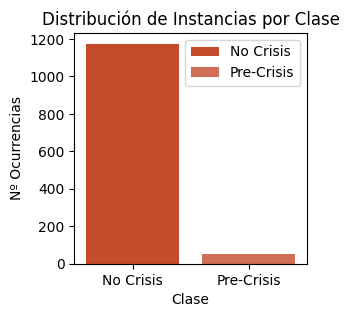

In [16]:
fig,ax = plt.subplots(figsize=(3,3))
ax = sns.countplot(data, x='crisisJST', palette=sns.color_palette(viu_colors,2)).set(title='Distribución de Instancias por Clase')
plt.xlabel('Clase')
plt.ylabel('Nº Ocurrencias')
plt.xticks(ticks=[0,1],labels=etiquetas)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_instancias_clase.png', bbox_inches='tight')
plt.show()

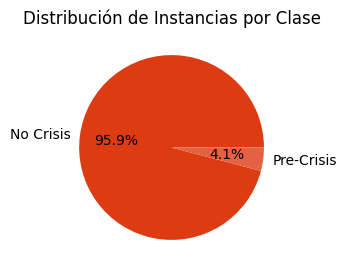

In [17]:
fig,ax = plt.subplots(figsize=(3,3))
aggregates = data['crisisJST'].value_counts()
plt.pie(aggregates, labels = etiquetas, colors=sns.color_palette(viu_colors, 2), autopct='%.1f%%')
plt.title('Distribución de Instancias por Clase')
plt.savefig('../app/graficas/comprension_final_porcentaje_clase.png', bbox_inches='tight')
plt.show()

Como se puede observar, el desbalance entre el número de muestras correspondientes a cada clase sigue siendo muy elevado.

<a id="135"></a>
### 1.3.5- Análisis exploratorio
Vamos a revisar a continuación distintas características sobre las distribuciones de las muestras como pueden ser los repartos de clases por año y país, distribución final de los valores ausentes, distribución de los distintos atributos en función del valor de la clase, etc.

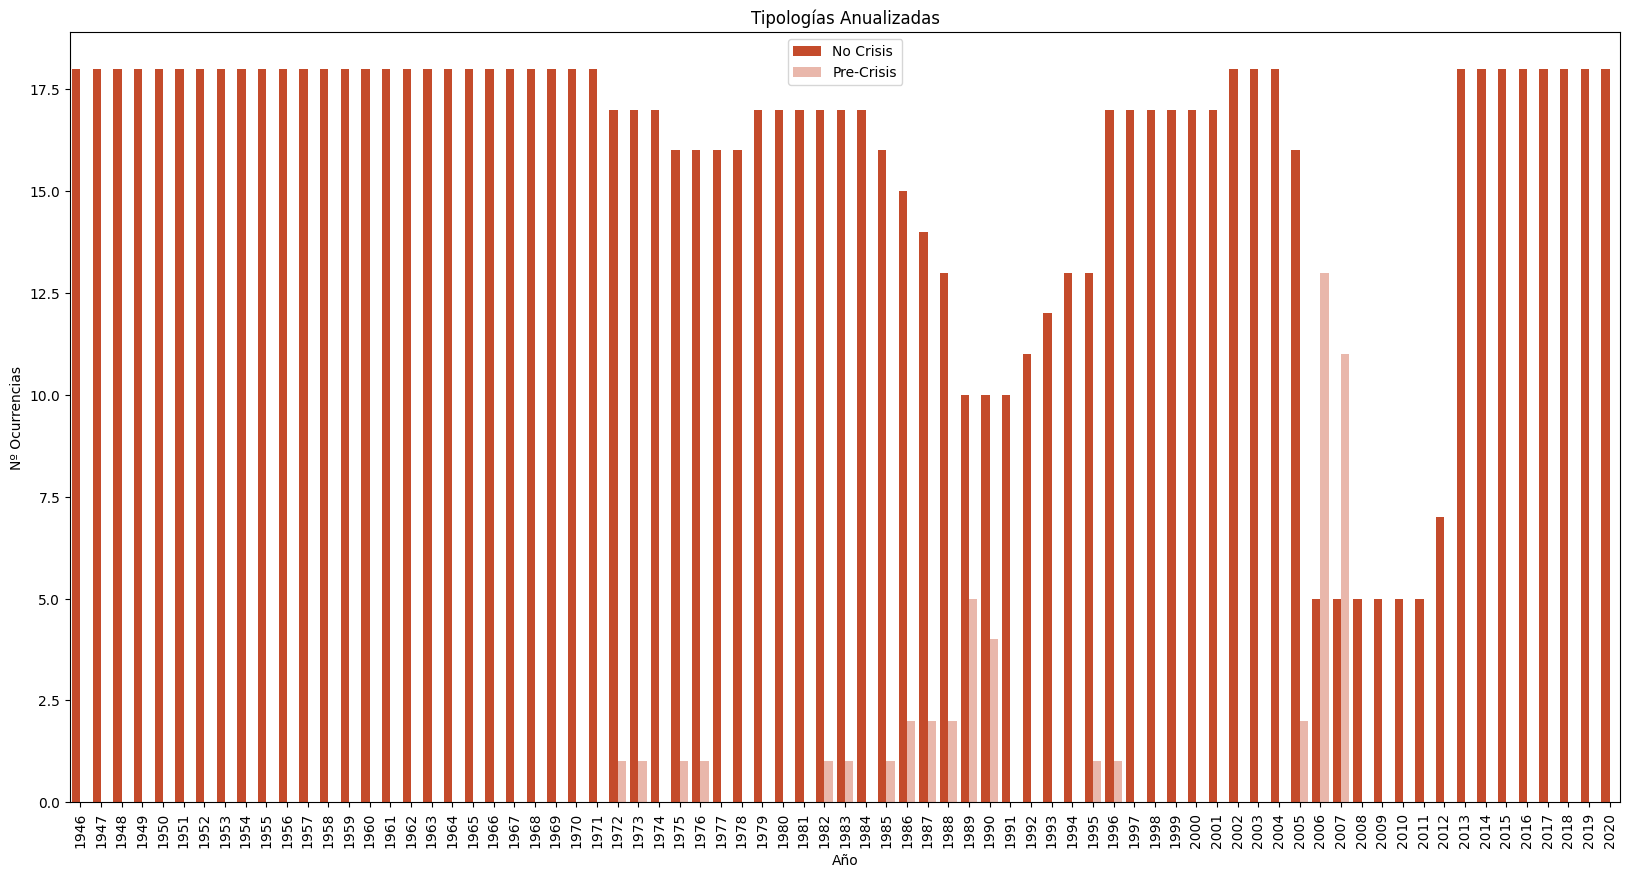

In [18]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data[['year', 'crisisJST']], x='year', hue='crisisJST', palette=sns.color_palette(['#dd3c12', '#f3b1a1'])).set(title='Tipologías Anualizadas')
plt.xlabel('Año')
plt.ylabel('Nº Ocurrencias')
plt.xticks(rotation=90)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_tipologias_anualizadas.png', bbox_inches='tight')
plt.show()

No se observan patrones destacables en relación a la distribución de clases por año, lo que apoya la decisión de no usar finalmente el atributo año de cara al entrenamiento de los modelos.

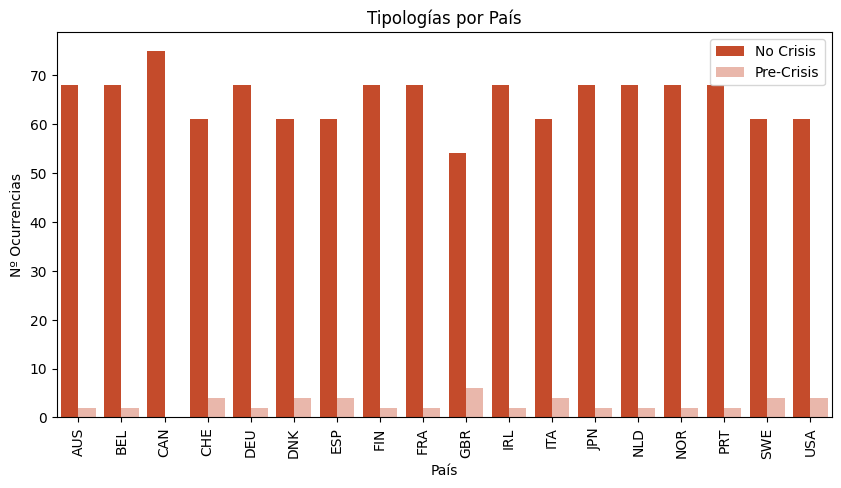

In [19]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data[['iso', 'crisisJST']], x='iso', hue='crisisJST', palette=sns.color_palette(['#dd3c12', '#f3b1a1'])).set(title='Tipologías por País')
plt.xlabel('País')
plt.ylabel('Nº Ocurrencias')
plt.xticks(rotation=90)
plt.legend(etiquetas)
plt.savefig('../app/graficas/comprension_final_tipologias_pais.png', bbox_inches='tight')
plt.show()

No se observan patrones destacables en relación a la distribución de clases por país (más allá de que como es normal hay más situaciones de economía normalizada), lo que apoya la decisión de no usar finalmente el atributo país de cara al entrenamiento de los modelos.

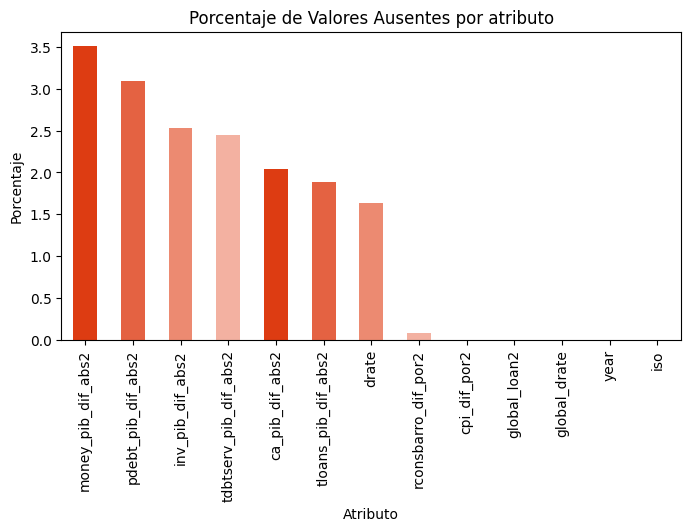

In [20]:
porcentaje.plot(kind="bar", figsize=(8,4), color=viu_colors).set(title='Porcentaje de Valores Ausentes por atributo')
plt.xlabel('Atributo')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
plt.savefig('../app/graficas/comprension_final_porcentaje_ausentes_atributo.png', bbox_inches='tight')
plt.show()

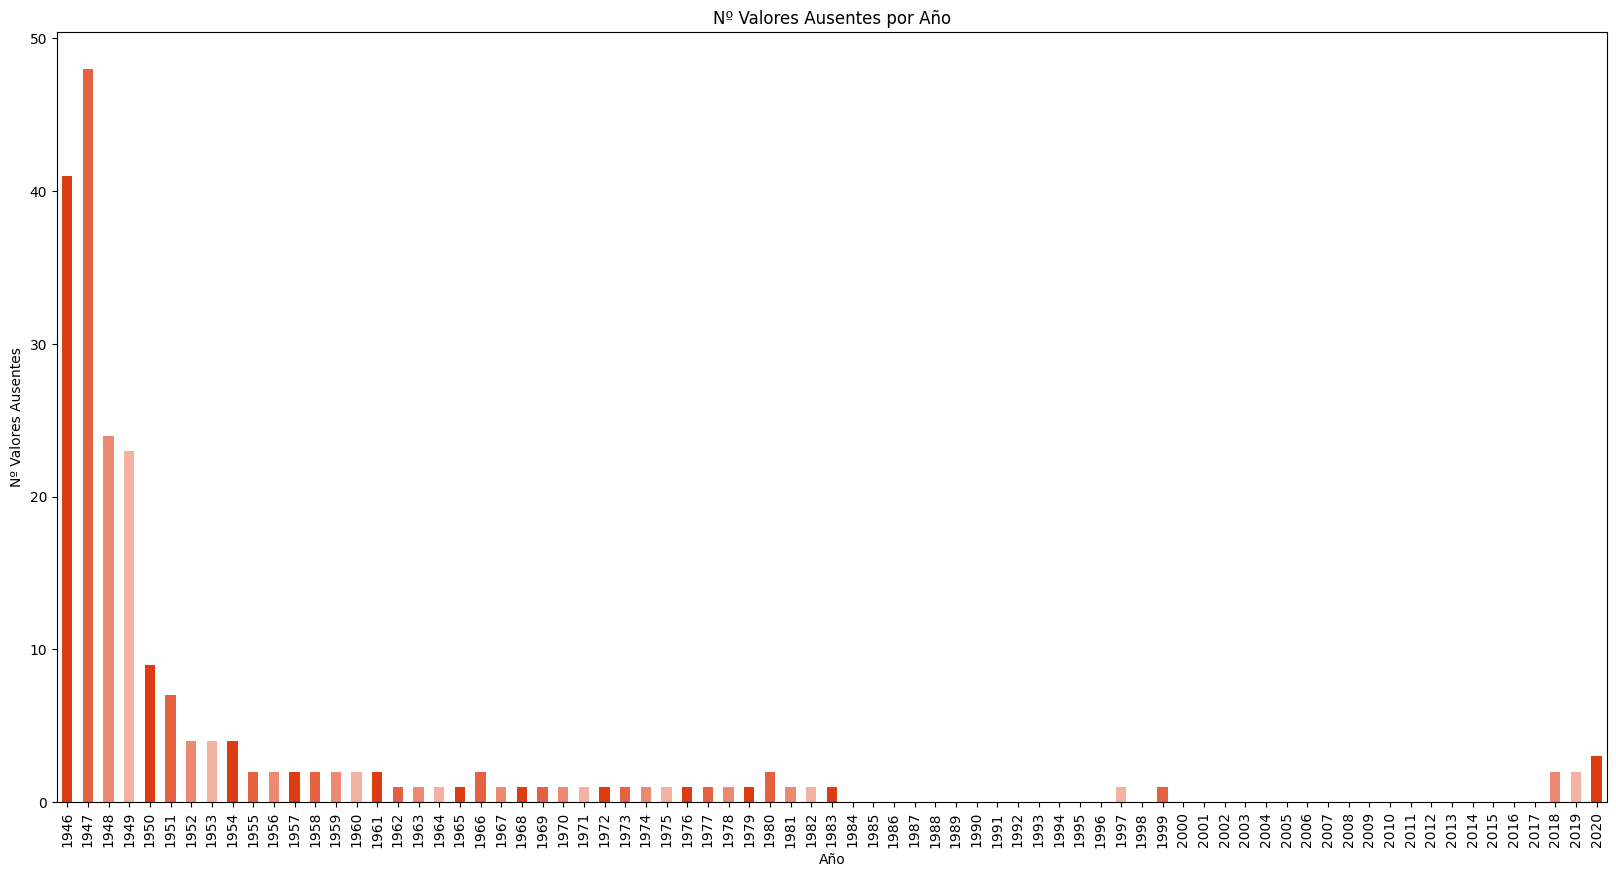

In [21]:
agrupacion = data.groupby('year').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Valores Ausentes por Año',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_final_ausentes_anio.png', bbox_inches='tight')
plt.show()

Se mantiene una distribución de valores ausentes focalizada sobre todo en los años iniciales, pero el volumen es bastante bajo y asumible para poder emplear distintas estrategias de imputación de valores ausentes.

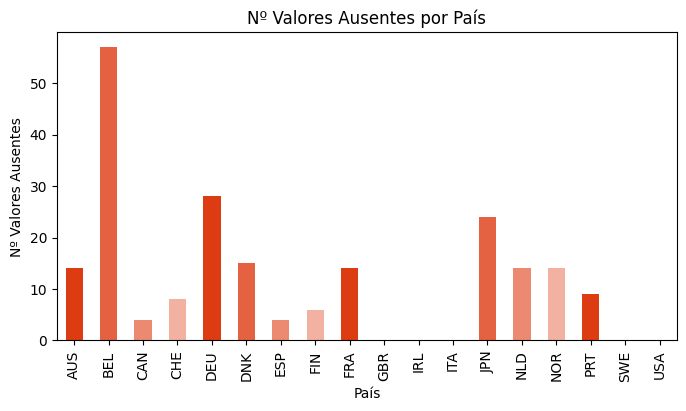

In [22]:
agrupacion = data.groupby('iso').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(8,4), xlabel='País', title='Nº Valores Ausentes por País',
             color=viu_colors)
plt.ylabel('Nº Valores Ausentes')
plt.savefig('../app/graficas/comprension_final_ausentes_pais.png', bbox_inches='tight')
plt.show()

Se observa que el número de valores ausentes es más acusado en unos países frente a otros.

#### Distribución de valores de atributos por país

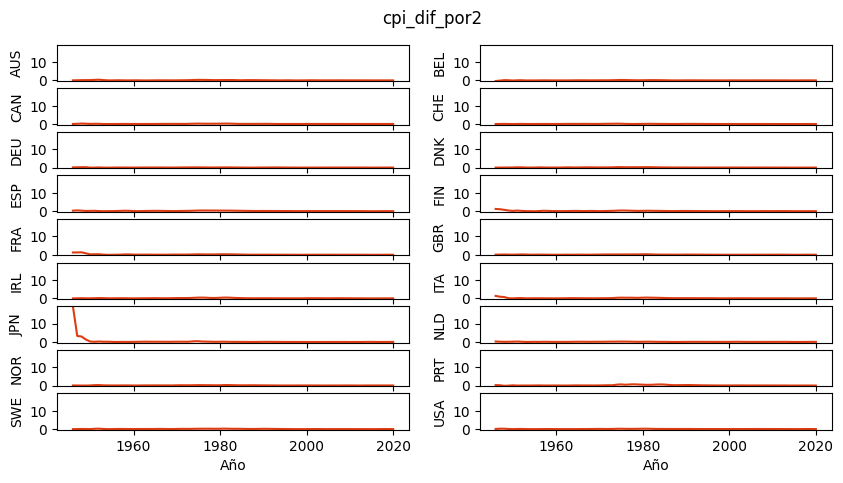

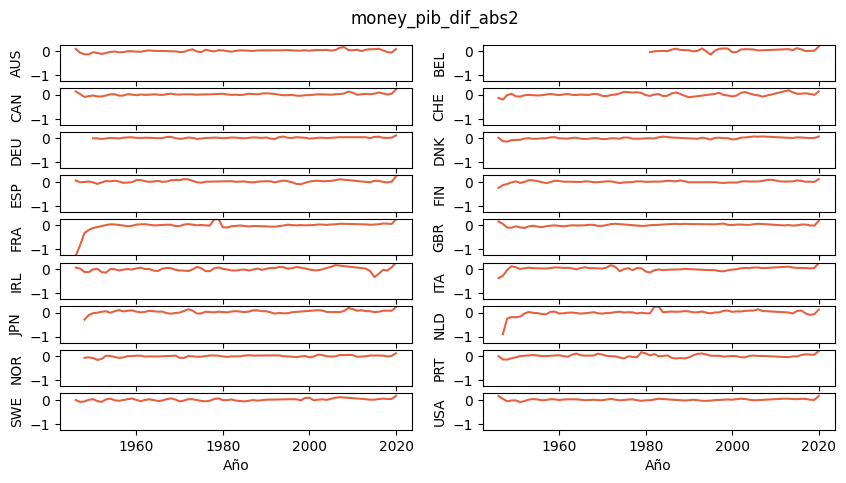

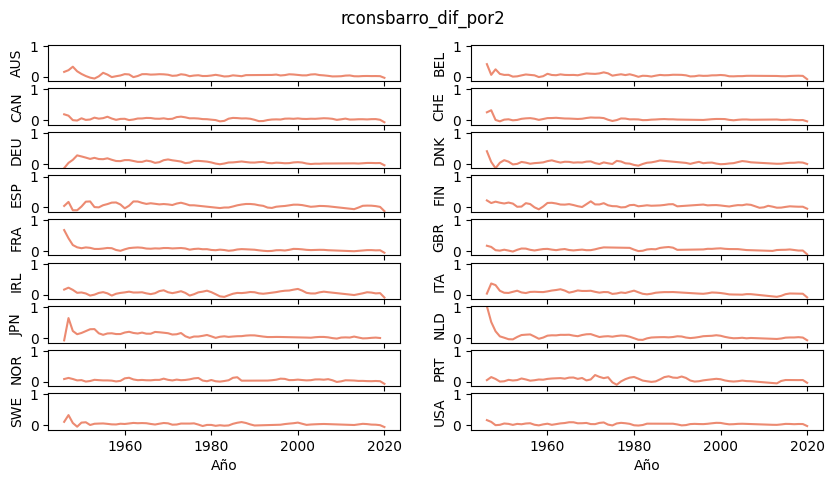

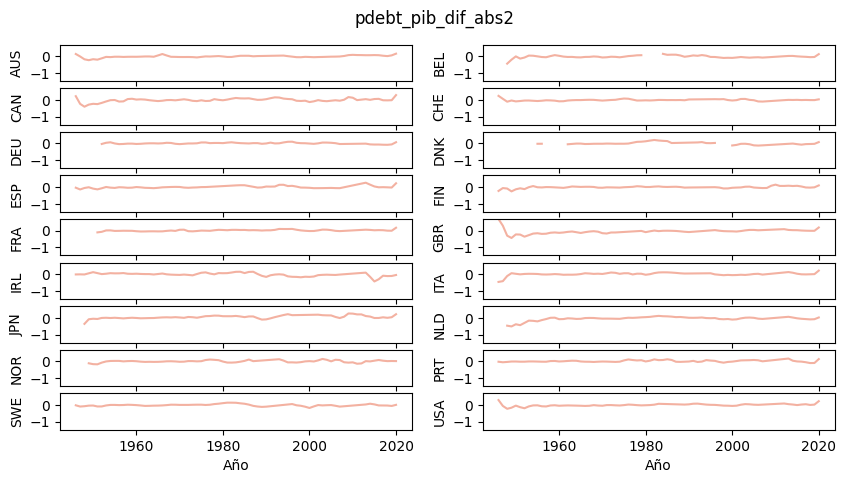

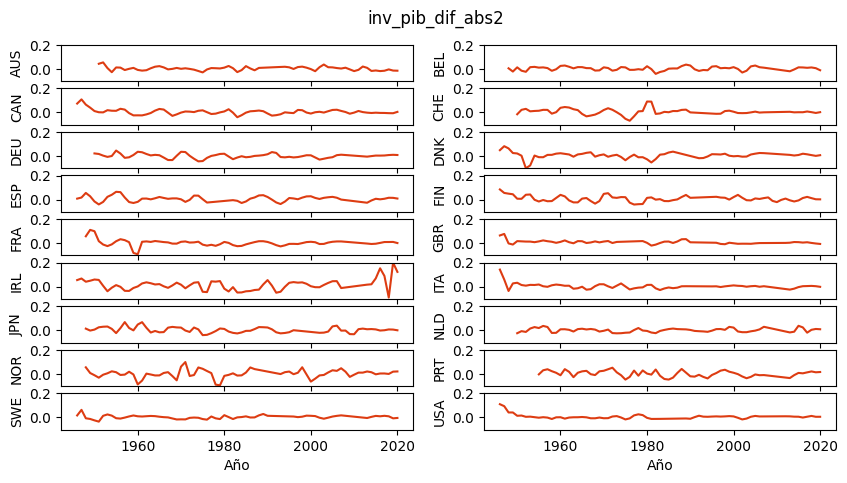

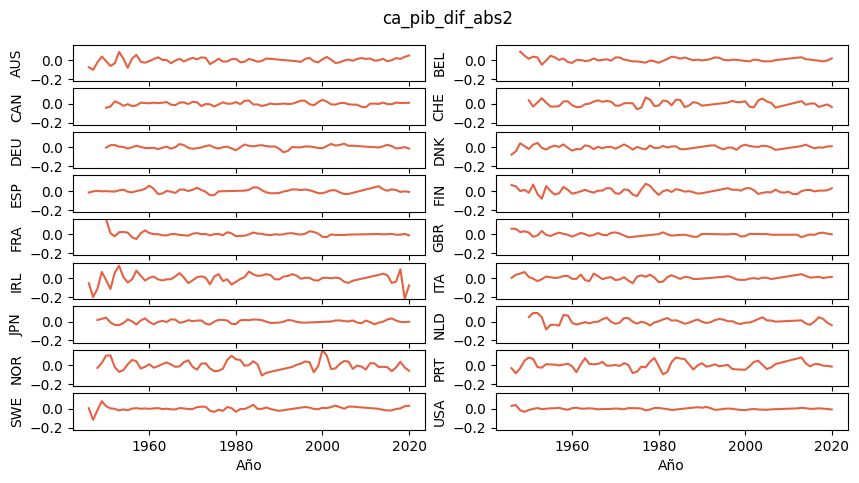

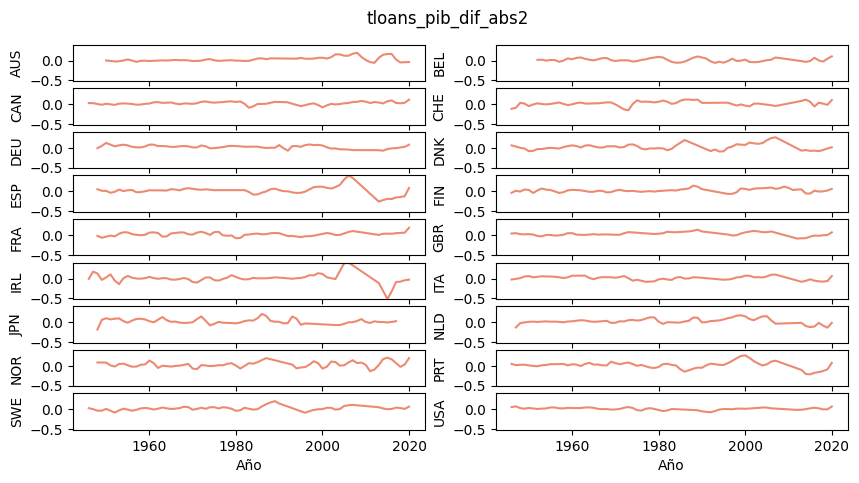

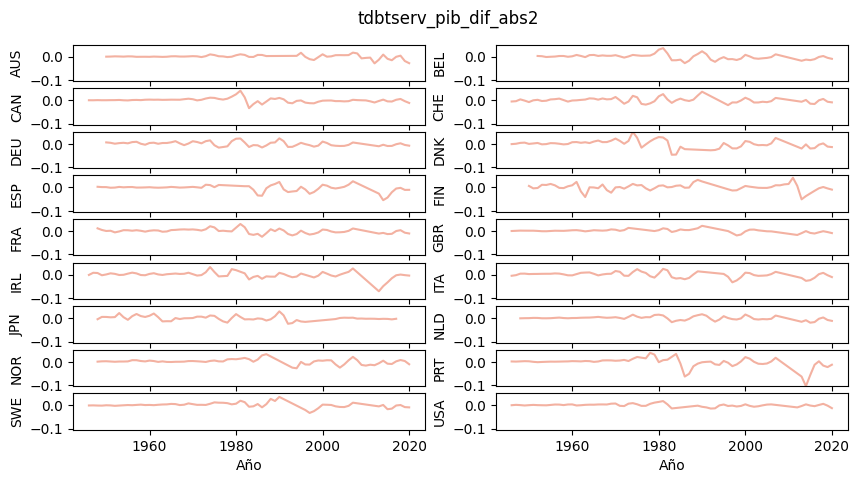

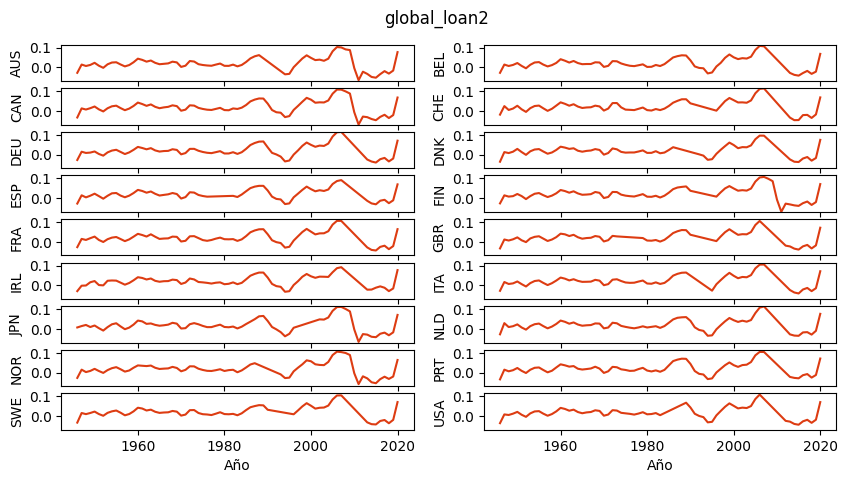

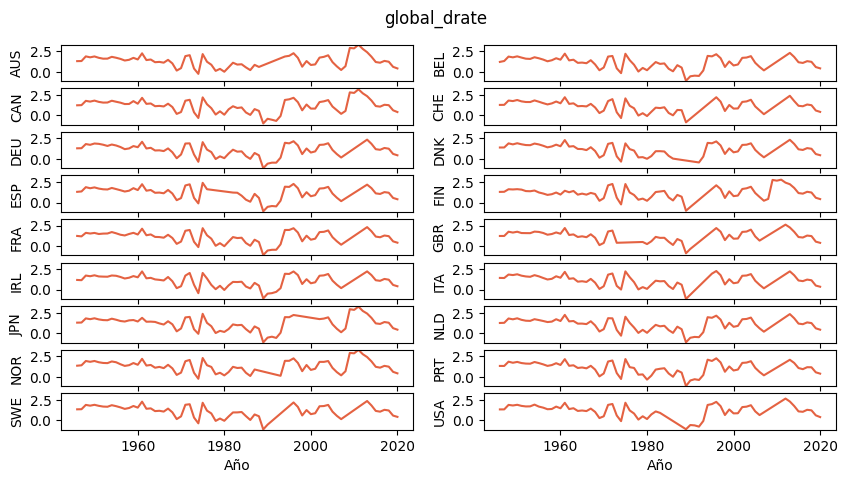

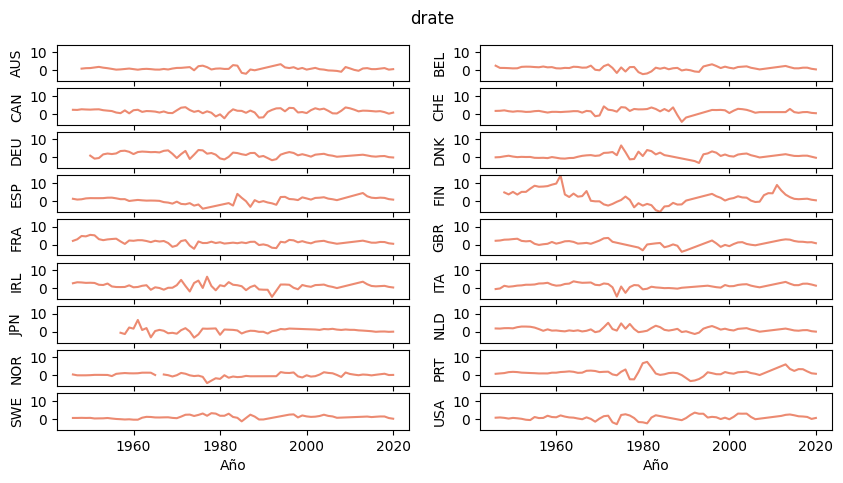

In [23]:
isos = list(data['iso'].unique())
columnas = data.columns

for i in range(data.shape[1]-3):
    fig, ax = plt.subplots(int(len(isos)/2), 2, sharex=True, figsize=(10, 5))
    contador = 0
    for j in range(int(len(isos)/2)):
        for k in range(2):
                ax[j,k].plot(data[data['iso'] == isos[contador]]['year'], data[data['iso'] == isos[contador]][columnas[i]], label=isos[contador], color=viu_colors[i]) 
                ax[j,k].set_ylabel(isos[contador], rotation=90)
                ax[j,k].set_ylim(data[columnas[i]].min(), data[columnas[i]].max())
                contador += 1
                ax[j,k].set_xlabel('Año')
    plt.suptitle(columnas[i], y=0.95)
    plt.savefig('../app/graficas/comprension_final_valores_atributos_pais_' + str(i) + '.png', bbox_inches='tight')
    plt.show()
    

Por lo general los rangos de los atributos para los distintos países son bastante parecidos. Destacar el cierto sesgo que introduce la variación del PIB de Japón al inicio de la serie temporal, lo que coincide con el lanzamiento en 1945 por parte de Estados Unidos de las bombas atómicas de Hiroshima y Nagasaki, lo que explica dicha variación abrupta dadas las consecuencias económicas.

#### Distribución de valores de atributos por clase

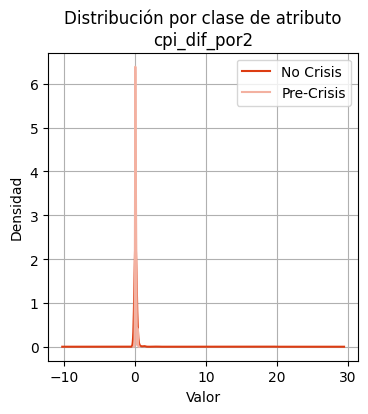

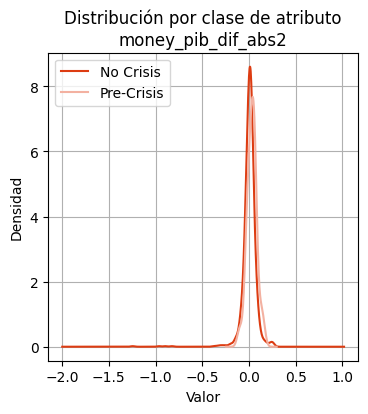

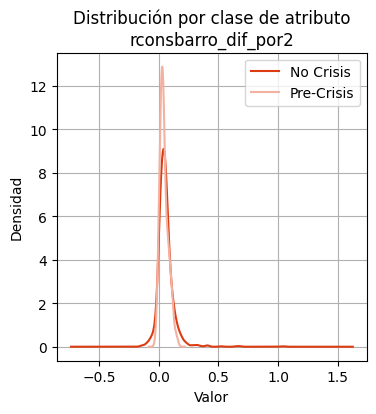

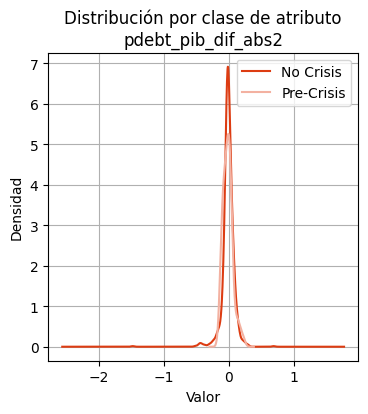

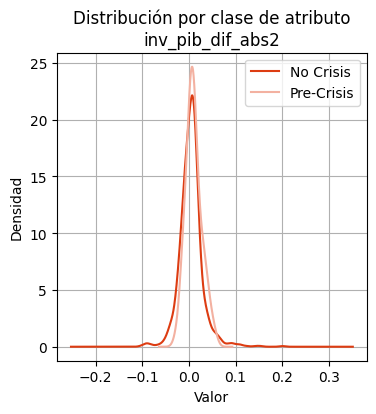

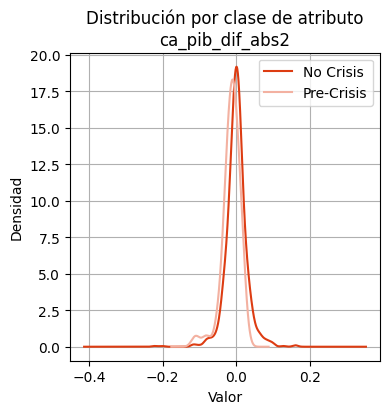

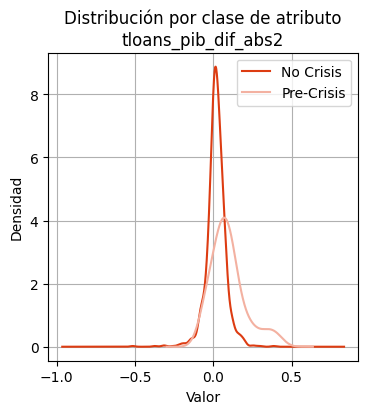

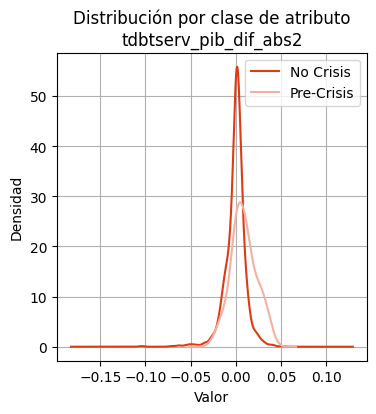

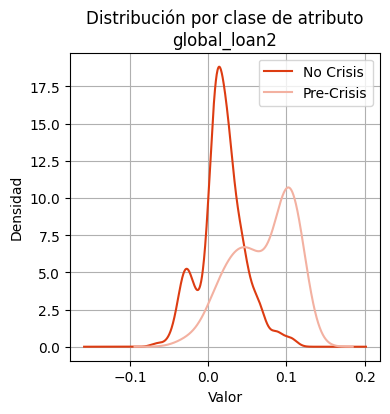

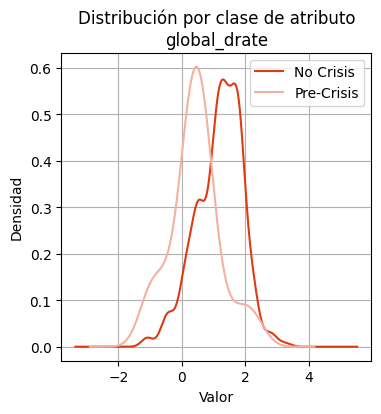

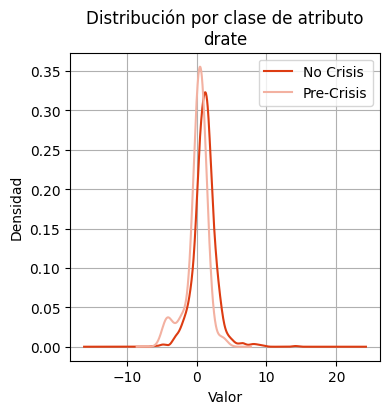

In [24]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#dd3c12', '#f3b1a1'])
for i in range(data.shape[1]-3):
    f, ax = plt.subplots()
    data.groupby("crisisJST")[columnas[i]].plot.kde(ax=ax, figsize=(4,4))
    ax.set_ylabel('Densidad')
    ax.set_xlabel('Valor')
    plt.legend(etiquetas)
    plt.title('Distribución por clase de atributo\n' + columnas[i])
    plt.grid()
    plt.savefig('../app/graficas/comprension_final_distribucion_atributos_clase_' + str(i) + '.png', bbox_inches='tight')
    plt.show()

In [25]:
display(data[data['crisisJST']==1].describe())

cpi_dif_por2  money_pib_dif_abs2  rconsbarro_dif_por2  \
count     50.000000           50.000000            50.000000   
mean       0.089658            0.031596             0.044976   
std        0.076636            0.052398             0.033930   
min        0.000000           -0.108737            -0.006549   
25%        0.036309            0.004222             0.021553   
50%        0.064339            0.032283             0.036240   
75%        0.124486            0.063846             0.067341   
max        0.384168            0.161399             0.144867   

       pdebt_pib_dif_abs2  inv_pib_dif_abs2  ca_pib_dif_abs2  \
count           50.000000         50.000000        50.000000   
mean            -0.014285          0.010089        -0.013764   
std              0.073533          0.016740         0.024197   
min             -0.125763         -0.024925        -0.110168   
25%             -0.067634         -0.000028        -0.024134   
50%             -0.021580          0.007981        -0.011331   
75%              0.020438          0.016921        -0.001436   
max              0.216028          0.053654         0.021899   

       tloans_pib_dif_abs2  tdbtserv_pib_dif_abs2  global_loan2  global_drate  \
count            50.000000              50.000000     50.000000     50.000000   
mean              0.095475               0.008633      0.070485      0.427117   
std               0.110939               0.013743      0.038013      0.782498   
min              -0.065054              -0.022638     -0.024386     -1.127733   
25%               0.030951               0.000807      0.038057      0.161357   
50%               0.078902               0.008044      0.085908      0.578361   
75%               0.127919               0.016482      0.105296      0.646290   
max               0.402512               0.036808      0.115063      2.406441   

           drate         year  crisisJST  
count  50.000000    50.000000       50.0  
mean    0.074644  1996.580000        1.0  
std     1.545310    11.146684        0.0  
min    -4.490000  1972.000000        1.0  
25%    -0.262533  1988.250000        1.0  
50%     0.439225  2005.000000        1.0  
75%     0.896833  2006.000000        1.0  
max     3.678333  2007.000000        1.0

+ Se observa que no existe una clara distinción en lo que a distribución de valores de los distintos atributos según la clase se refiere, a excepción de 'tloans_pib_dif_abs2' y 'tdbtserv_pib_dif_abs2' de manera muy débil y principalmente de 'global_loan2' y 'global_drate'.
+ Incluso si nos limitamos a revisar el comportamiento de los atributos para las muestras asociadas a la clase 'pre-crisis' y su desviación estándar, se observa que las variaciones en el rango histórico y geográfico han sido pequeñas. Ésto indicaría en parte que en el ámbito bajo estudio los indicadores de posible crisis serán bastante estables y concentrados.

Vamos a revisar si aumentando las dimensionalidades de los gráficos de manera que se contemplen distribuciones en base a varios atributos simultáneamente, se observan diferenciaciones más pronunciadas.

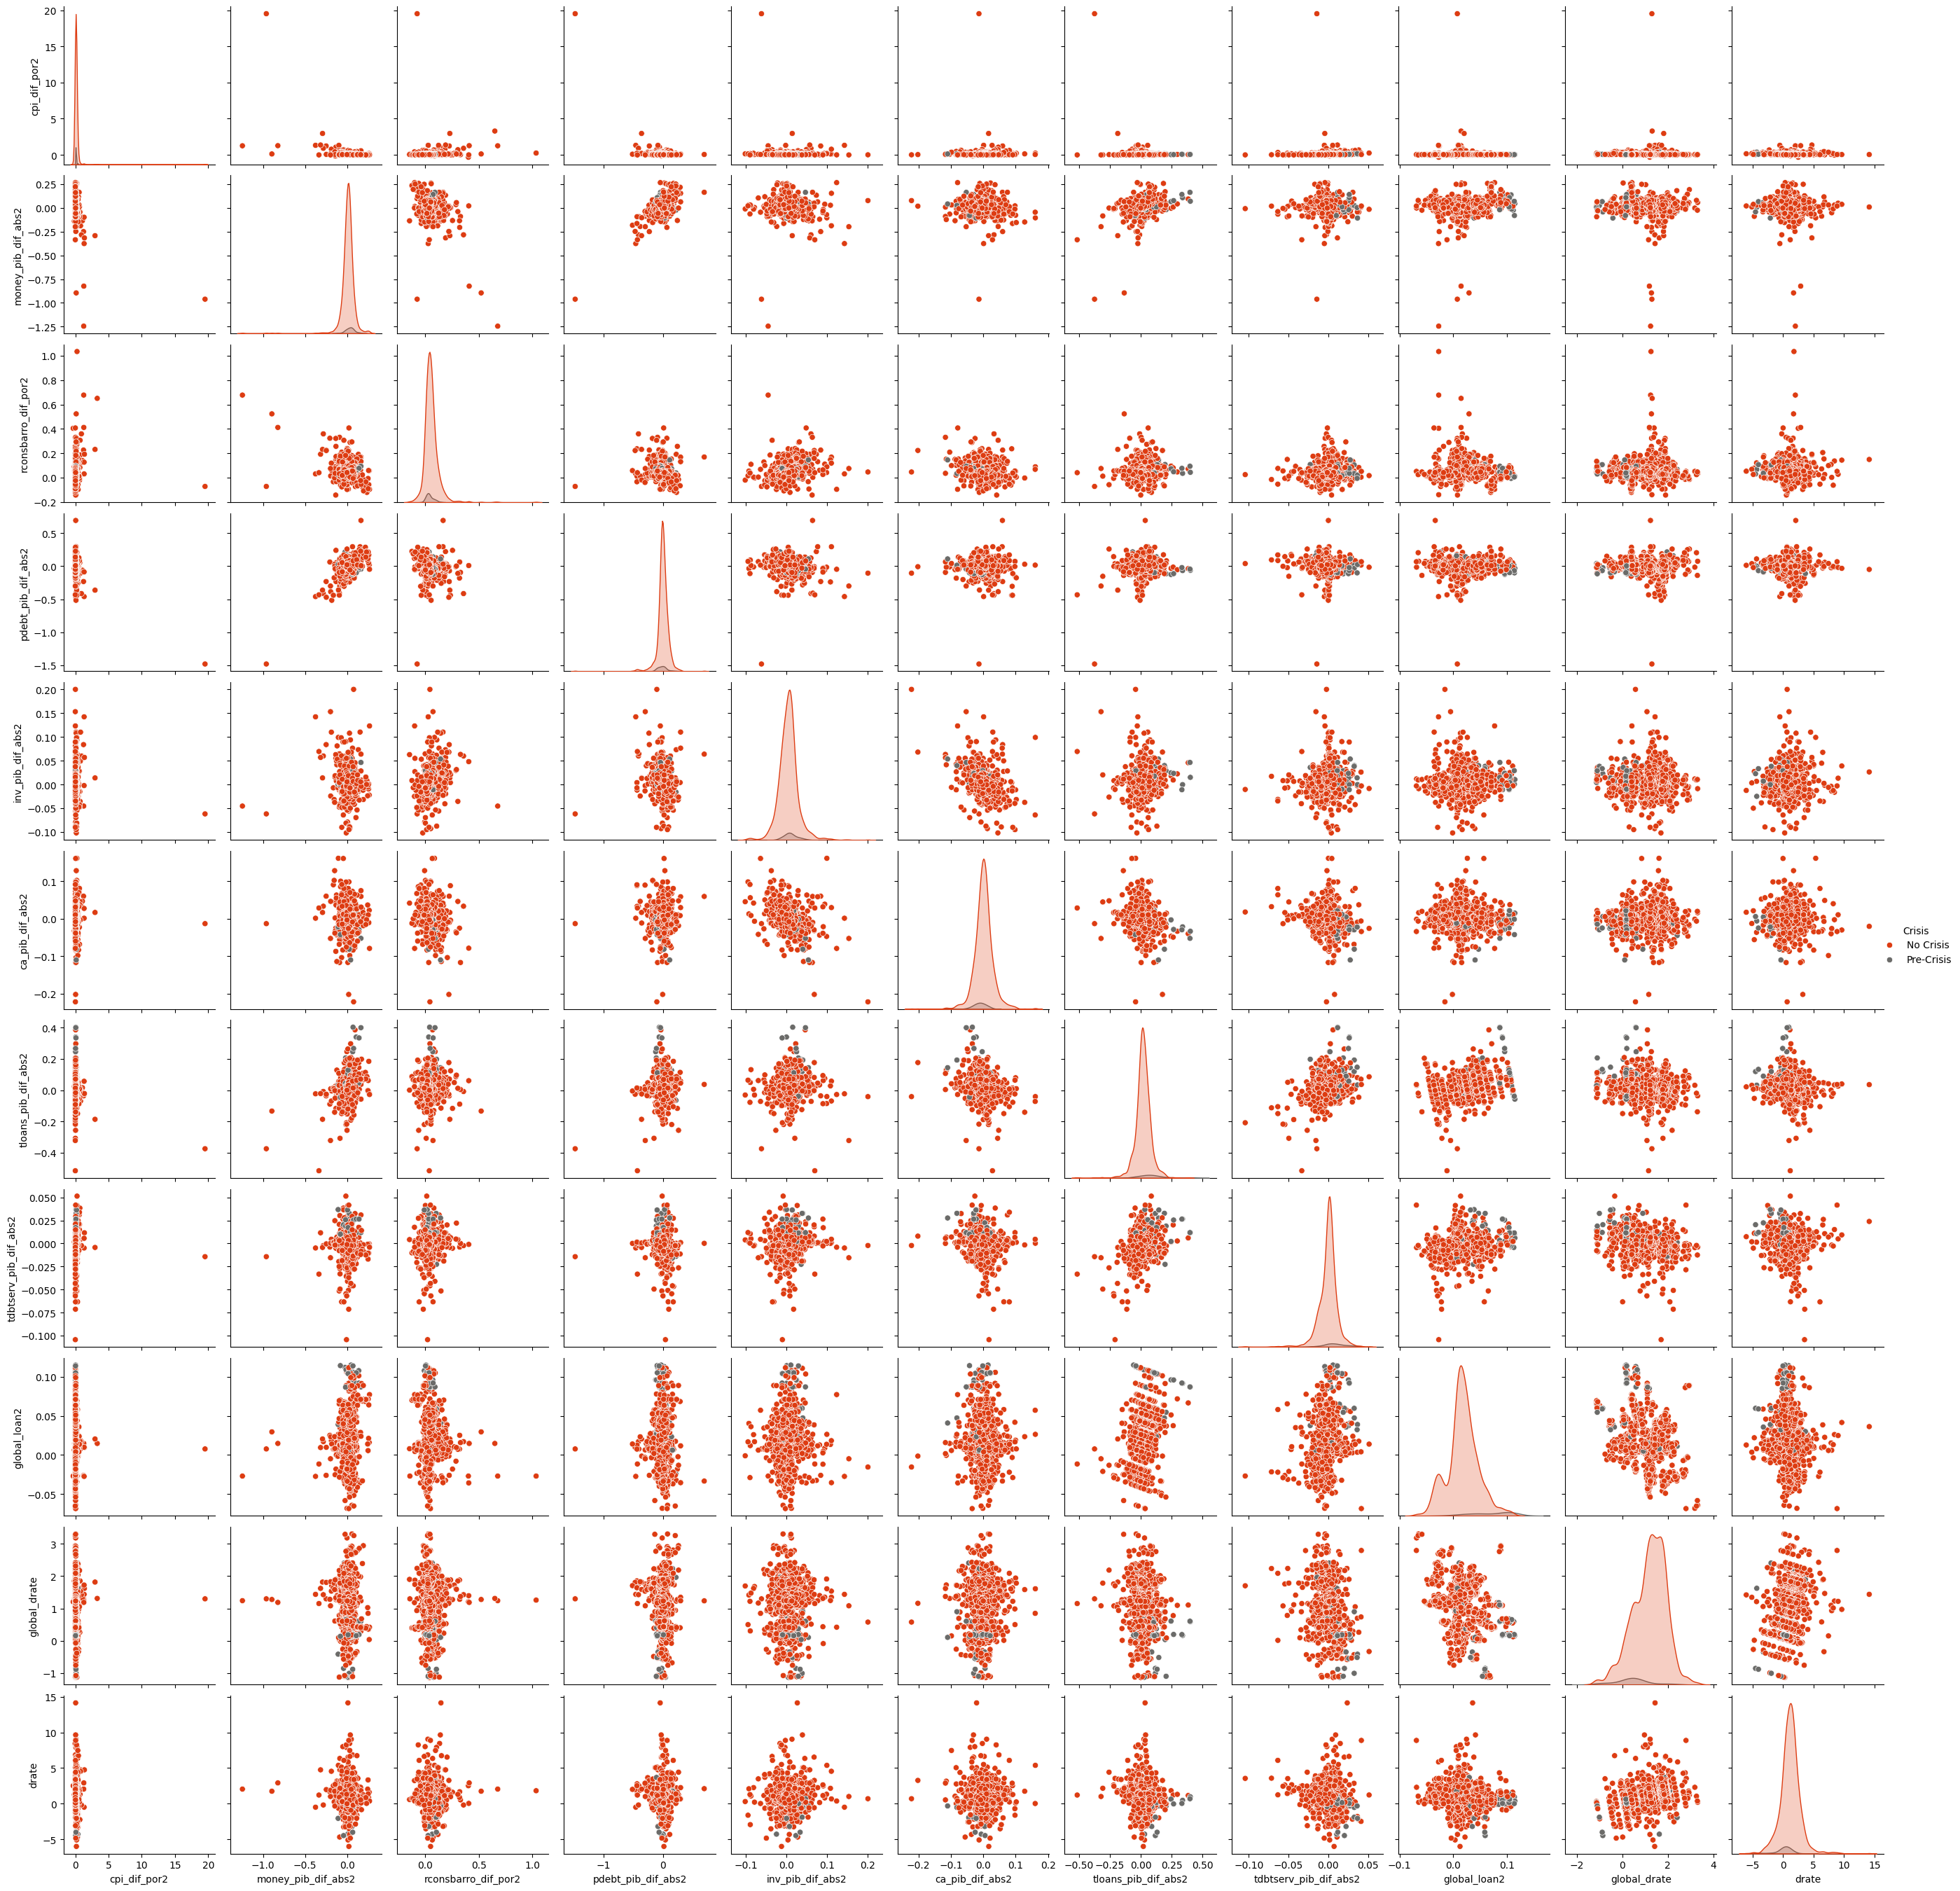

In [26]:
scatter_colors = ['#dd3c12', '#6b6b69']
grafico = sns.pairplot(data.loc[:, ~data.columns.isin(['year', 'iso'])], hue='crisisJST', palette=sns.color_palette(scatter_colors))
grafico._legend.set_title("Crisis")
for i, j in zip(grafico._legend.texts, etiquetas): i.set_text(j)
plt.savefig('../app/graficas/comprension_final_pairplot.png', bbox_inches='tight')
plt.show()

Usando dos variables, se empiezan a observar ciertas diferenciaciones según la clase como podría ser el caso de la combinación ('pdebt_pib_dif_abs2', 'tdbtserv_pib_dif_abs2'), donde las muestras asociadas a 'pre-crisis' paracen más concentradas en una determinada zona del espacio, aunque siguen con poca diferenciación con respecto a las muestras de 'no crisis'.

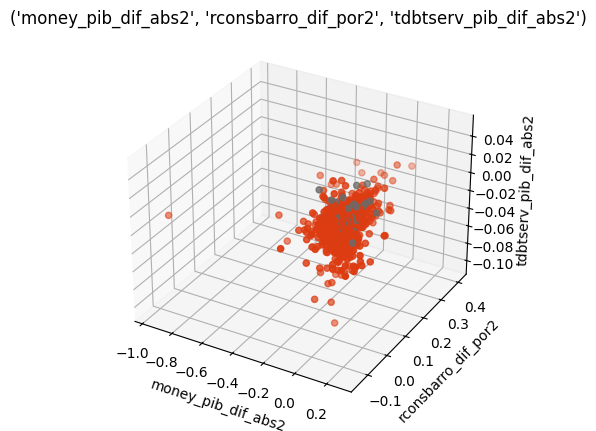

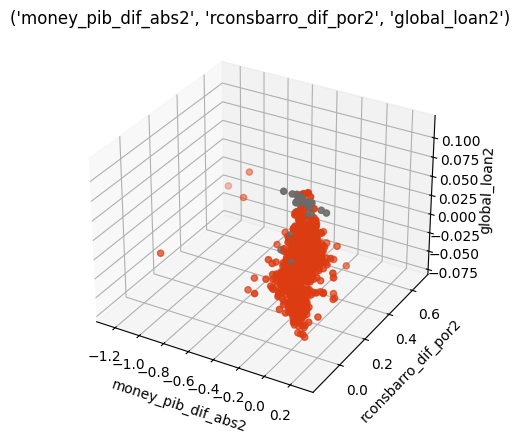

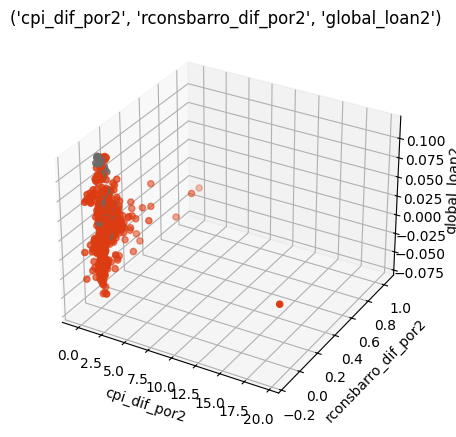

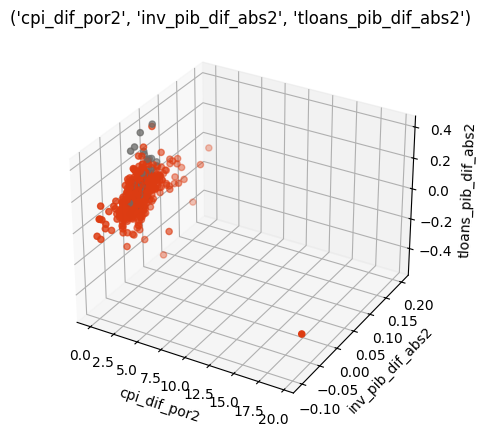

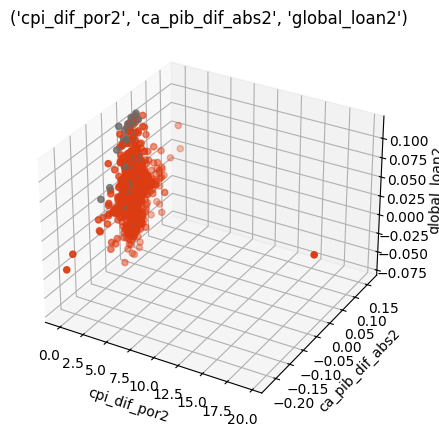

In [27]:
combinaciones = [('money_pib_dif_abs2', 'rconsbarro_dif_por2', 'tdbtserv_pib_dif_abs2'), ('money_pib_dif_abs2', 'rconsbarro_dif_por2', 'global_loan2'), ('cpi_dif_por2', 'rconsbarro_dif_por2', 'global_loan2'), ('cpi_dif_por2', 'inv_pib_dif_abs2', 'tloans_pib_dif_abs2'), ('cpi_dif_por2', 'ca_pib_dif_abs2', 'global_loan2')]
viu_cmap = ListedColormap(['#dd3c12', '#6b6b69'], name='viu_cmap')
for combinacion in combinaciones:    
    fig = plt.figure(figsize = (8, 5))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(data[combinacion[0]], data[combinacion[1]], data[combinacion[2]], c=data['crisisJST'], cmap=viu_cmap)
    plt.title(combinacion)
    ax.set_xlabel(combinacion[0])
    ax.set_ylabel(combinacion[1])
    ax.set_zlabel(combinacion[2])
    plt.savefig('../app/graficas/graficas3D_' + combinacion[0] + '_' + combinacion[1] + '_' + combinacion[2] + '.png', bbox_inches='tight')
    plt.show()

Ampliando a tres dimensiones y como se puede ver en los gráficos anteriores, se empieza a observar una mayor diferenciación entre muestras de cada clase. por lo que en principio los modelos requerirán de múltiples dimensiones para poder localizar fronteras de decisión.

El análisis de datos se complementará posteriormente durante la etapa de preprocesamiento de datos y más en concreto en la fase de selección de atributos, en la cual se procederá a analizar qué atributos son discriminativos con respecto a la clase, se presentarán sus diagramas de caja-bigotes y se calculará el grado de correlación entre ellos para decidir qué atributos se usan finalmente durante la fase de entrenamiento de modelos.

<a id="14"></a>
## 1.4- Guardar dataset final

In [28]:
import os
if not os.path.exists('../datasets/finales'):
    os.mkdir('../datasets/finales')

data.to_csv('../datasets/finales/data_final.csv', sep=';', na_rep='', decimal=',', index=False)